## Trabajo Practico n° 1 - Organización de datos

### *Alumno: Sebastian Leonardi*

### *Año 2018 - 1er cuatrimestre*


In [51]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
#plt.subplots(figsize=(20,15))
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

### Se cargan todos los Dataframes

In [52]:
postulantes_ed = pd.read_csv('fiuba_1_postulantes_educacion.csv')
postulantes_ge = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('fiuba_3_vistas.csv')
postulaciones = pd.read_csv('fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('fiuba_6_avisos_detalle.csv')

### Se inspecciona el dataframe de educación de postulantes

In [53]:
postulantes_ed.head()  

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [54]:
postulantes_ed['nombre']=postulantes_ed['nombre'].astype('category')
postulantes_ed['estado']=postulantes_ed['estado'].astype('category')

In [55]:
col_rename={'nombre':'estudios'}
postulantes_ed=postulantes_ed.rename(columns=col_rename)

In [56]:
postulantes_ed.head()

,idpostulante,estudios,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [57]:
postulantes_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
estudios        298231 non-null category
estado          298231 non-null category
dtypes: category(2), object(1)
memory usage: 2.8+ MB


In [58]:
postulantes_ed.estado.value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [59]:
postulantes_ed['carrera']=postulantes_ed['estudios'].astype('object')+' '+postulantes_ed['estado'].astype('object')

### Hay postulantes con muchas carreras - Hay que depurar

En el dataframe de postulantes se observa que por cada persona, se pueden encontrar varias carreas, de distinto nivel y en distinto estado. Esto es seguramentes porque esta extraido del CV online en los cuales los postulantes cargan toda su historia de estudio.
A nosotros, para el analisis que queremos hacer, nos interesa conocer de cada postulante el nivel mas alto de estudio de cada uno.
En el siguiente cuadro se puede observar el ejemplo de una persona con varios estudios (en este caso, es el postulante que mas estudios cargo)

In [60]:
postulantes_ed.loc[postulantes_ed['idpostulante']== 'YlMLGD']

,idpostulante,estudios,estado,carrera
373,YlMLGD,Terciario/Técnico,En Curso,Terciario/Técnico En Curso
374,YlMLGD,Otro,En Curso,Otro En Curso
375,YlMLGD,Universitario,En Curso,Universitario En Curso
2206,YlMLGD,Terciario/Técnico,Graduado,Terciario/Técnico Graduado
2207,YlMLGD,Universitario,Graduado,Universitario Graduado
2208,YlMLGD,Otro,Graduado,Otro Graduado
2209,YlMLGD,Posgrado,Graduado,Posgrado Graduado
3659,YlMLGD,Universitario,Abandonado,Universitario Abandonado
3660,YlMLGD,Terciario/Técnico,Abandonado,Terciario/Técnico Abandonado


Para poder extraer el estudio mas alto de cada persona, es necesario ponderar cada opcion, a fin de poder determinar numericamente un filtro que haga dicha eleccion.
Por eso se procede a ponderar cada carrera con los siguientes valores:
Secundario=10pts
Otro=20pts
Terciario/tecnico=30pts
Universitario=40pts
Posgrado=50pts
Master=60pts
Doctorado=70pts

Vale aclarar que el criterio de asignar 20pts a el tipo "Otros" se debe a que si bien puede ser un estudio superior, no cuadra dentro del resto, y no se podria poner con un nivel mas alto a estos. A su vez, consideramos que el secundario es el nivel mas bajo para acceder a un trabajo actualmente.

Tambien se pondera con 2 y 4 puntos a las carreras en estados "En Curso" y "Graduado" respectivamente, para distinguir el nivel con quienes abandoraron la carrera.

La combinacion del nivel de estudios y su estado, nos va a dar el nivel final de estudios de cada persona, dado que una vez ponderada cada carrera cargada, se hara la extraccion por el valor mas alto, dejando un solo estudio por persona.


In [61]:
postulantes_ed['pondera_carrera'] = 0

In [62]:
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Secundario',10,postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Otro',20,postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Terciario/Técnico',30,postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Universitario',40,postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Posgrado',50,postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Master',60,postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estudios']=='Doctorado',70,postulantes_ed['pondera_carrera'])

In [63]:
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estado']=='En Curso',postulantes_ed['pondera_carrera']+2, postulantes_ed['pondera_carrera'])
postulantes_ed['pondera_carrera']=np.where(postulantes_ed['estado']=='Graduado',postulantes_ed['pondera_carrera']+4, postulantes_ed['pondera_carrera'])

In [64]:
postulantes_ed

,idpostulante,estudios,estado,carrera,pondera_carrera
0,NdJl,Posgrado,En Curso,Posgrado En Curso,52
1,8BkL,Universitario,En Curso,Universitario En Curso,42
2,1d2B,Universitario,En Curso,Universitario En Curso,42
3,NPBx,Universitario,En Curso,Universitario En Curso,42
4,NPBx,Master,En Curso,Master En Curso,62
5,Ym2X,Otro,En Curso,Otro En Curso,22
6,ZKl5,Master,En Curso,Master En Curso,62
7,EDD99,Terciario/Técnico,En Curso,Terciario/Técnico En Curso,32
8,Y043Z,Universitario,En Curso,Universitario En Curso,42
9,6M3jr,Universitario,En Curso,Universitario En Curso,42


In [65]:
postulantes_edmax = postulantes_ed.groupby('idpostulante')['pondera_carrera'].max()

In [66]:
postulantes_edmax

idpostulante
0z5VvGv    14
0zB026d    34
0zB03O9    32
0zB08lq    14
0zB0NWY    44
0zB0Xwd    42
0zB0YGv    40
0zB0e1d    42
0zB0eDY    34
0zB0qGE    24
0zB0xL1    42
0zB10m8    44
0zB11wr    44
0zB16Dr    42
0zB16o9    34
0zB1Bev    14
0zB1J2E    62
0zB1LYv    14
0zB1PJY    34
0zB1RG9    14
0zB1XB1    42
0zB1YOY    42
0zB1oA1    44
0zB26aa    42
0zB2KJv    34
0zB2Nva    14
0zB2VOa    34
0zB2Xza    40
0zB2ojr    14
0zB2pbr    40
           ..
zvxvo6J    14
zvxvoJ3    34
zvxvr1D    40
zvxw936    14
zvxwAlJ    44
zvxwNr6    30
zvxwVYD    14
zvxwar6    14
zvxwdK6    14
zvxwpEb    42
zvxx0k6    42
zvxx8x5    14
zvxxKwb    14
zvxxQNk    40
zvxxaE8    14
zvxxeND    24
zvxxj2E    14
zvxxo0E    14
zvxxwDb    14
zvxz33k    40
zvxz5rE    42
zvxz9p5    32
zvxzJaE    14
zvxzJqE    42
zvxzJr3    44
zvxzVr8    14
zvxzeBK    34
zvxzjoK    32
zvxzmED    14
zvxzrWm    44
Name: pondera_carrera, Length: 188752, dtype: int64

In [67]:
carreras_pond = postulantes_ed.groupby('carrera')['pondera_carrera'].max().to_frame()

In [68]:
carreras_pond

,pondera_carrera
carrera,
Doctorado Abandonado,70
Doctorado En Curso,72
Doctorado Graduado,74
Master Abandonado,60
Master En Curso,62
Master Graduado,64
Otro Abandonado,20
Otro En Curso,22
Otro Graduado,24


In [69]:
carreras_pond = carreras_pond.reset_index()

In [70]:
carreras_pond = carreras_pond.set_index('pondera_carrera')

In [71]:
carreras_pond

,carrera
pondera_carrera,
70,Doctorado Abandonado
72,Doctorado En Curso
74,Doctorado Graduado
60,Master Abandonado
62,Master En Curso
64,Master Graduado
20,Otro Abandonado
22,Otro En Curso
24,Otro Graduado


In [72]:
carreras_pond['carrera'] =  carreras_pond['carrera'].astype('category')

In [73]:
carreras_pond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 70 to 44
Data columns (total 1 columns):
carrera    21 non-null category
dtypes: category(1)
memory usage: 997.0 bytes


In [74]:
postulantes_edmax = postulantes_edmax.to_frame()
postulantes_edmax = postulantes_edmax.reset_index()

In [75]:
postulantes_edmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188752 entries, 0 to 188751
Data columns (total 2 columns):
idpostulante       188752 non-null object
pondera_carrera    188752 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [76]:
postulantes_carrera = postulantes_edmax.join(carreras_pond, on='pondera_carrera', rsuffix='post', lsuffix='pond', how='left')


In [77]:
postulantes_carrera

,idpostulante,pondera_carrera,carrera
0,0z5VvGv,14,Secundario Graduado
1,0zB026d,34,Terciario/Técnico Graduado
2,0zB03O9,32,Terciario/Técnico En Curso
3,0zB08lq,14,Secundario Graduado
4,0zB0NWY,44,Universitario Graduado
5,0zB0Xwd,42,Universitario En Curso
6,0zB0YGv,40,Universitario Abandonado
7,0zB0e1d,42,Universitario En Curso
8,0zB0eDY,34,Terciario/Técnico Graduado
9,0zB0qGE,24,Otro Graduado


Una vez filtrado el mayor nivel de estudios por persona, se pueden contar los valores y tener un panorama mas acabado de la distribucion de estudios en el universo de postulantes.
Mas adelante se realizara el grafico de esta tabla

In [78]:
postulantes_carrera.carrera.value_counts()

Secundario Graduado             50309
Universitario En Curso          46685
Universitario Graduado          31258
Terciario/Técnico Graduado      14665
Universitario Abandonado         9895
Terciario/Técnico En Curso       9730
Otro Graduado                    6347
Posgrado Graduado                4072
Secundario En Curso              3163
Terciario/Técnico Abandonado     3034
Secundario Abandonado            2483
Master Graduado                  1895
Posgrado En Curso                1730
Master En Curso                  1449
Otro En Curso                    1074
Otro Abandonado                   373
Posgrado Abandonado               248
Master Abandonado                 131
Doctorado Graduado                105
Doctorado En Curso                 91
Doctorado Abandonado               15
Name: carrera, dtype: int64

### Se analiza el Dataframe de Genero/Fecha Nacimiento

Este dataframe contiene las fechas de nacimiento y género de los postulantes.
Para poder apreciar el universo de personas que se postulan, y poder combinarlo con el estudio maximo alcanzado, se procede a trabajar el mismo


In [79]:
postulantes_ge.describe()

,idpostulante,fechanacimiento,sexo
count,200888,196138,200888
unique,200888,15027,3
top,1aP4PR,1991-06-20,FEM
freq,1,57,101981


In [80]:
postulantes_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [81]:
postulantes_ge['sexo']=postulantes_ge['sexo'].astype('category')

In [82]:
postulantes_ge['fechanacimiento'].isnull().sum()

4750

### Hay 4750 postulantes que no tienen fecha de nacimiento.

De un universo de 200888 postulantes, existen 4750 que no tienen fecha de nacimiento, por lo cual, a fines estadisticos, se decide sacar a los mismos del analisis. Suponemos que dicha eliminacion no afectara el resultado final de saber la distribución de postulantes por edad, tanto en su totalidad como separados por sexo.

In [83]:
postulantes_ge['fechanacimiento']=postulantes_ge['fechanacimiento']+' 00:00:00'

In [84]:
#postulantes_ge['fechanacimiento']=postulantes_ge['fechanacimiento'].astype('datetime64[ns]')

### Se analiza el dataframe de visualizaciones de los avisos

In [85]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [86]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [87]:
vistas['timestamp']=vistas['timestamp'].astype('datetime64[ns]')

### Se analiza el dataframe de postulaciones

Este dataframe es el mas grande en tamaño con 3.401.623 postulaciones.
Se va a analizar combinado con las areas de los avisos y los estudios de los postulantes.

In [88]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [89]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [90]:
postulaciones['fechapostulacion']=postulaciones['fechapostulacion'].astype('datetime64[ns]')

### Se analiza el Dataframe de Avisos publicados

In [91]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [92]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [93]:
avisos_online.columns

Index(['idaviso'], dtype='object')

### Se analiza el dataframe de detalle de los avisos

In [94]:
avisos_detalle.head(10)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola


In [95]:
avisos_detalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [96]:
avisos_detalle=avisos_detalle.drop(columns=['idpais', 'ciudad', 'mapacalle'])

In [97]:
avisos_detalle.describe()

,idaviso
count,1.353400e+04
mean,1.110816e+09
std,3.235817e+07
min,1.585950e+06
25%,1.112222e+09
50%,1.112279e+09
75%,1.112339e+09
max,1.112389e+09


In [98]:
# Avisos
print(avisos_detalle.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 8 columns):
idaviso                 13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(1), object(7)
memory usage: 846.0+ KB
None


In [99]:
avisos_detalle['nombre_area'].value_counts().head(50)

Ventas                                 1659
Comercial                               983
Administración                          901
Producción                              821
Programación                            576
Contabilidad                            416
Tecnologia / Sistemas                   388
Atención al Cliente                     347
Mantenimiento                           324
Recursos Humanos                        235
Gastronomia                             234
Oficios y Profesiones                   209
Soporte Técnico                         203
Logística                               200
Call Center                             191
Almacén / Depósito / Expedición         184
Compras                                 170
Otros                                   153
Marketing                               153
Administración de Personal              152
Recepcionista                           151
Transporte                              148
Mantenimiento y Limpieza        

In [100]:
#avisos_detalle['ciudad'].value_counts() -- BORRADA

In [101]:
## avisos_detalle['ciudad'].isnull().sum() -- BORRADA

In [102]:
avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

In [103]:
avisos_detalle['nombre_zona'].isnull().sum()

0

In [104]:
avisos_detalle['nombre_zona'] = avisos_detalle['nombre_zona'].astype('category')

In [105]:
## avisos_detalle['idpais'].value_counts() -- BORRADA

In [106]:
avisos_detalle['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [107]:
avisos_detalle['tipo_de_trabajo'] = avisos_detalle['tipo_de_trabajo'].astype('category')

In [108]:
avisos_detalle['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

In [109]:
avisos_detalle['nivel_laboral'] = avisos_detalle['nivel_laboral'].astype('category')

In [110]:
avisos_detalle['denominacion_empresa'].value_counts()

RANDSTAD                                        562
Manpower                                        422
Grupo Gestión                                   383
Assistem                                        289
SOLUTIX S.A.                                    260
BAYTON                                          238
Pullmen Servicios Empresarios S.A.              229
Adecco - Región NORTE & OESTE GBA               205
Suministra                                      203
Adecco -Región Office                           200
Consultores de Empresas SRL                     197
Complement Group (holding)                      160
Adecco -Región GBA SUR                          160
Kaizen Recursos Humanos                         110
CrossOver                                       109
Adecco  -Región Litoral                         109
IT Resources                                    109
Excelencia Laboral S.A.                          98
Swiss Medical Group                              88
Suple       

# Conclusiones a priori del analisis del dataframe de detalle de Avisos

- Hay 13534 avisos
- Son todos pertenecientes a Argentina, por lo que la columna Pais, se descarta
- La mayoria de las busquedas (69%) apuntan a perfiles Semi-Senior y Senior
- El mayor volumen de publicaciones esta hecho por parte de empresas de recursos humanos que realizan busquedas para terceros, como ser Adecco, Randstad, Kaizen, Bayton, Manpower y otras
- La mayoria de los avisos son para puestos Full Time
- Existe poca informacion de la ubicacion de las busquedas, por lo cual se descarta la información y se borra la columna
- todos los avisos se circunscriben a la zona de Capital y Gran BA, por lo que no resulta relevante un analisis por region.
- 


# ------------------------------------------------------------------------------------
# Análisis y gráficos de los Datos
# ------------------------------------------------------------------------------------

## Primero visualizamos la proporcion en el nivel de experiencia buscado en el conjunto de los avisos

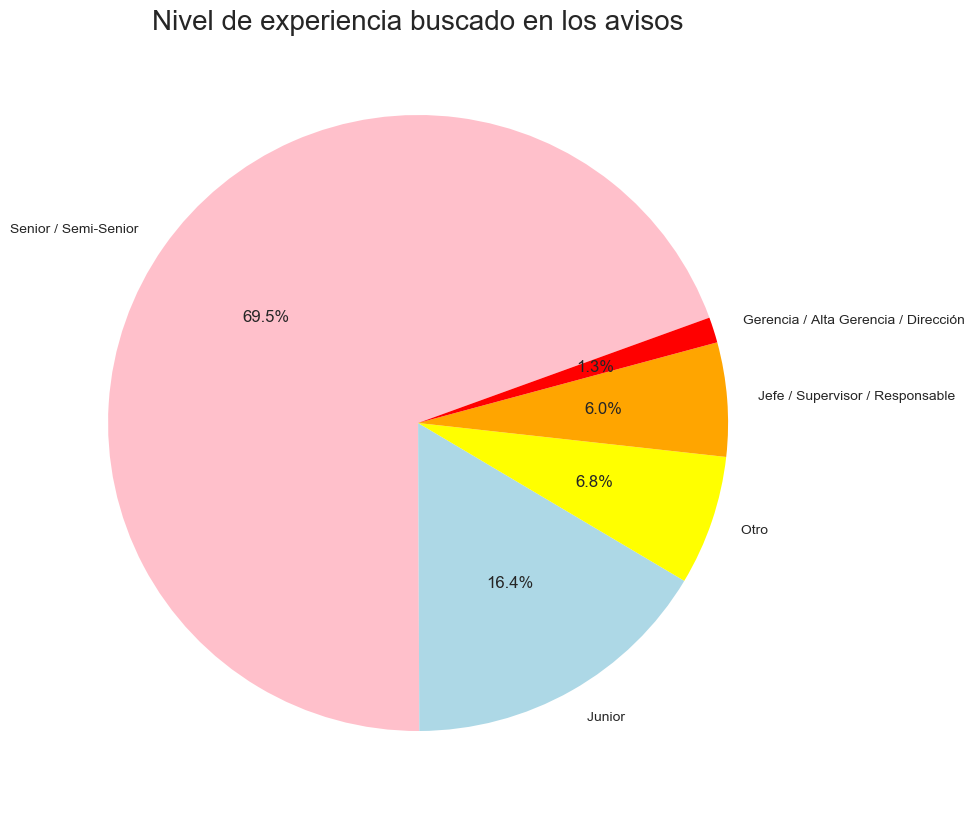

In [111]:
nivel_experiencia_buscado = avisos_detalle['nivel_laboral'].value_counts()
nombres = ['Senior / Semi-Senior','Junior ','Otro ','Jefe / Supervisor / Responsable','Gerencia / Alta Gerencia / Dirección']

plt.figure(figsize=(10, 10))
plt.title('Nivel de experiencia buscado en los avisos', fontsize=20)
plt.pie(nivel_experiencia_buscado, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'lightblue', 'yellow', 'orange', 'red', 'green'])
#plt.show()
plt.savefig('figure00.png')

## Analizamos y graficamos la informacion relacionada a sexo y edad de los postulantes

In [112]:
postulantes_genn = postulantes_ge[postulantes_ge['fechanacimiento'].notnull()]

In [113]:
postulantes_genn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196138 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196138 non-null object
fechanacimiento    196138 non-null object
sexo               196138 non-null category
dtypes: category(1), object(2)
memory usage: 4.7+ MB


In [114]:
postulantes_genn['fechanacimiento'] = postulantes_genn.fechanacimiento.astype('datetime64[ns]')
postulantes_genn['sexo'] = postulantes_genn.sexo.astype('category')

C:\Users\Seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
postulantes_ge['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [116]:
postulantes_genull = postulantes_ge[postulantes_ge['fechanacimiento'].isnull()]

In [117]:
postulantes_genull.count()

idpostulante       4750
fechanacimiento       0
sexo               4750
dtype: int64

In [118]:
postulantes_genull['sexo'].value_counts()

NO_DECLARA    4123
MASC           323
FEM            304
Name: sexo, dtype: int64

In [119]:
now = pd.Timestamp(dt.datetime.now())

In [120]:
print(now)

2018-04-16 00:52:22.999696


In [121]:
postulantes_genn['fechanacimiento'] = postulantes_genn['fechanacimiento'].astype('datetime64[ns]')
                                                                                        

C:\Users\Seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
postulantes_genn['edad'] = (now - postulantes_genn['fechanacimiento']).astype('timedelta64[Y]')

C:\Users\Seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
#postulantes_genull['fechanacimiento'] = postulantes_genull['fechanacimiento'].where(postulantes_genull['fechanacimiento'] < now, postulantes_genull['fechanacimiento'] -  np.timedelta64(100, 'Y')) 

In [124]:
postulantes_genn['edad'] = postulantes_genn['edad'].astype('int')

C:\Users\Seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
postulantes_genn['edad'].value_counts()

26     11992
25     11779
24     11633
27     11519
23     11366
22     10706
28      9980
21      9676
29      9569
30      8381
31      7928
20      7845
32      6949
33      6012
19      5796
34      5587
35      5117
36      4879
37      4253
38      3958
39      3539
40      3084
41      2697
18      2680
42      2383
43      2191
44      1729
45      1558
46      1522
47      1335
       ...  
59       254
61       190
60       170
17       142
62       118
63        76
64        47
67        34
65        27
66        20
68        15
69         9
70         7
75         5
71         3
73         2
12         1
253        1
251        1
74         1
76         1
78         1
96         1
100        1
230        1
232        1
235        1
240        1
242        1
260        1
Name: edad, Length: 71, dtype: int64

In [126]:
postulantes_genn = postulantes_genn[(postulantes_genn['edad'] < 76) & (postulantes_genn['edad'] > 18)]

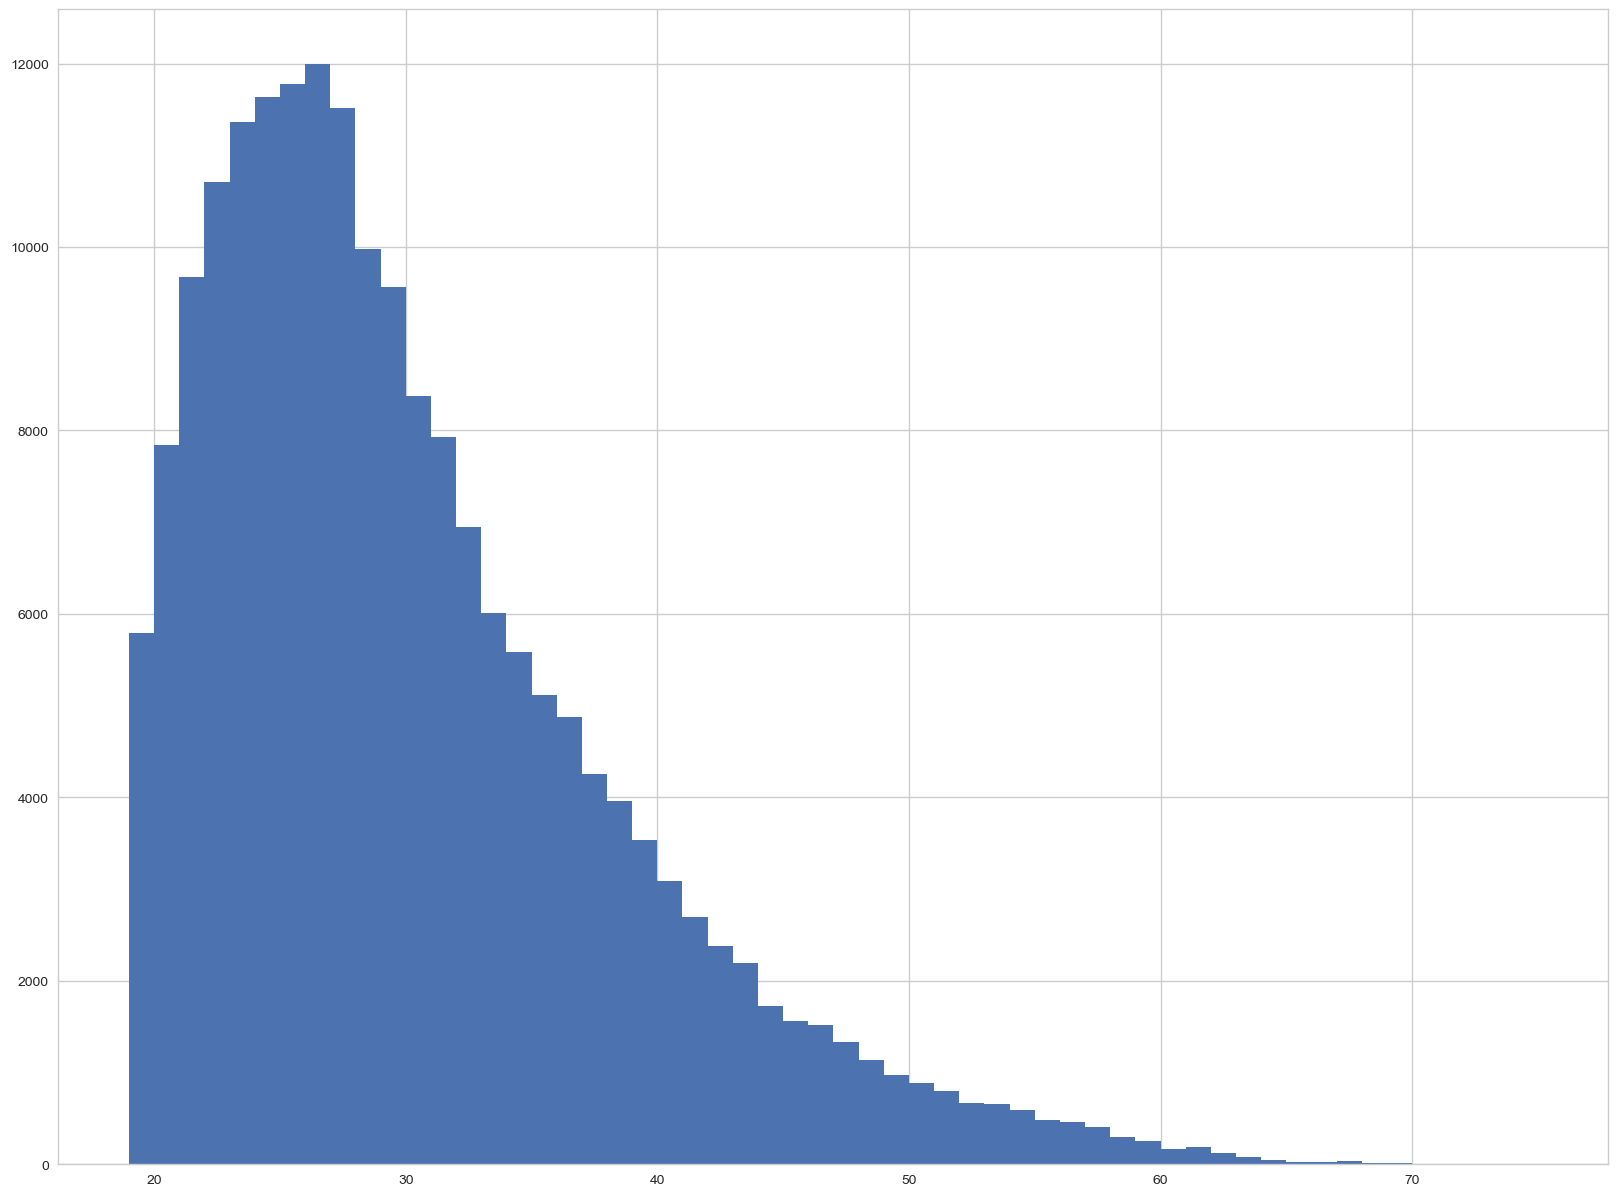

In [127]:
plt.subplots(figsize=(20,15))
postulantes_genn['edad'].hist(bins=56)
plt.savefig('figure01.png')

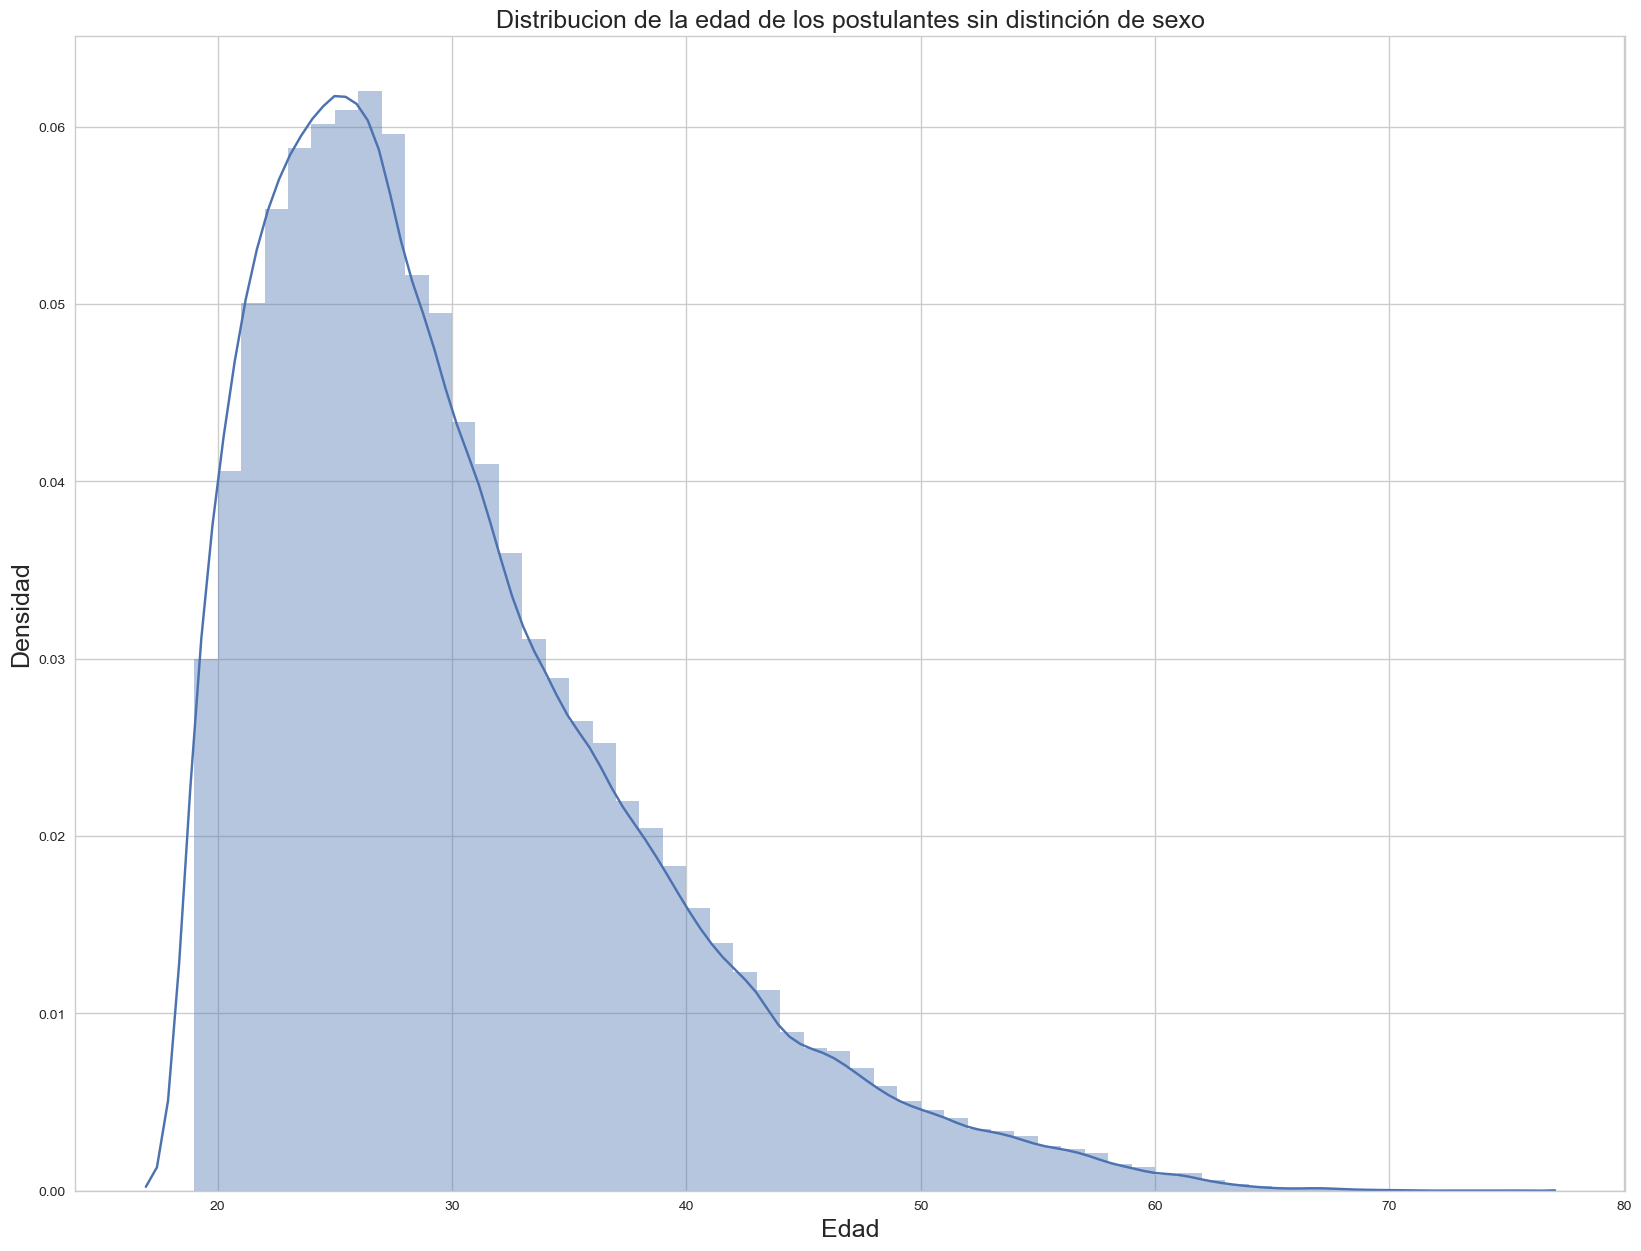

In [128]:
plt.subplots(figsize=(20,15))
graf = sns.distplot(postulantes_genn["edad"], bins=56)
graf.set_title("Distribucion de la edad de los postulantes sin distinción de sexo", fontsize=18)
graf.set_xlabel("Edad",fontsize=18)
graf.set_ylabel("Densidad", fontsize=18)
plt.savefig('figure02.png')

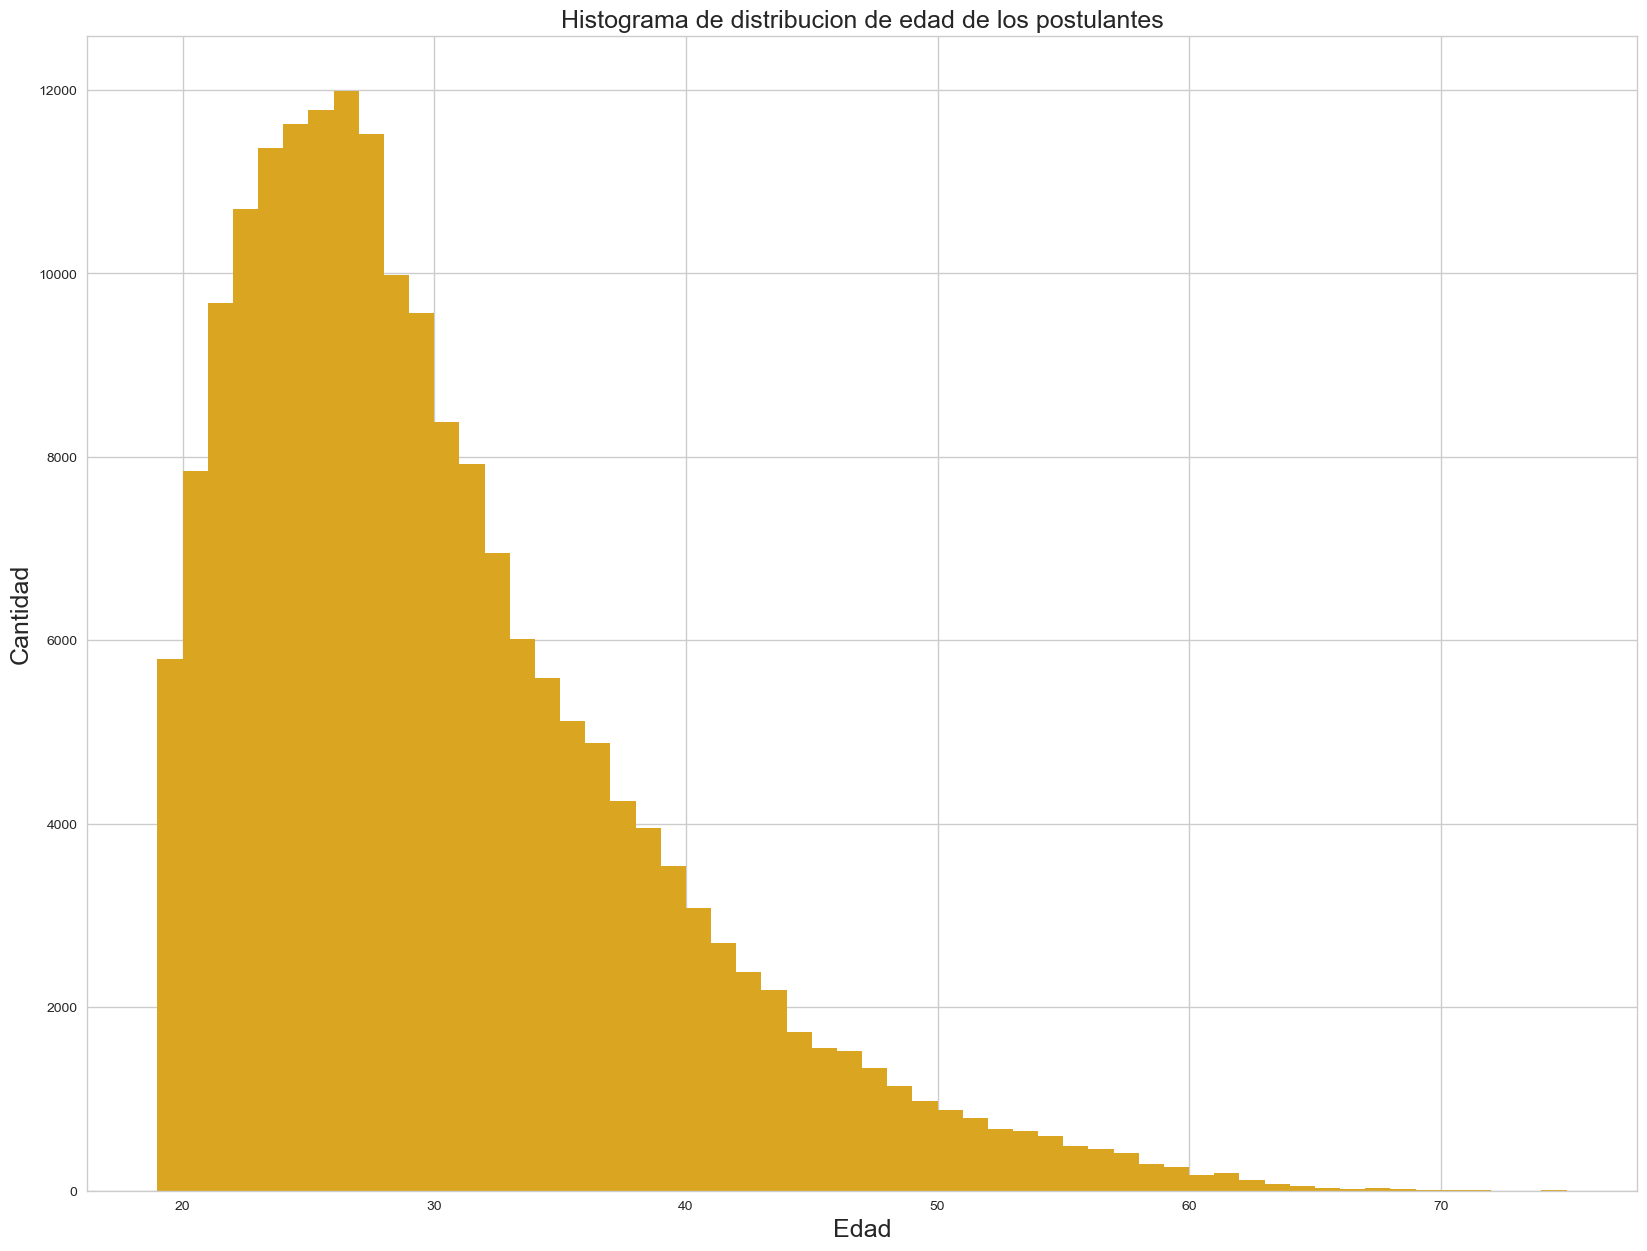

In [129]:
plt.subplots(figsize=(20,15))
graf = postulantes_genn["edad"].plot.hist(bins=56, color='goldenrod')
graf.set_title("Histograma de distribucion de edad de los postulantes", fontsize=18)
graf.set_xlabel("Edad",fontsize=18)
graf.set_ylabel("Cantidad", fontsize=18)
plt.savefig('figure03.png')

# Analisis de la distribucion de edades

Se realizo el grafico de distribución de postulantes por edad.
Como dato importante podemos destacar que la mayor cantidad de postulantes se concentra entre los 20 y 30 años de edad
Si bien aparecen en los estremos algunos valores, se decidio descartar los postulantes con edades menores a 18 (por un tema legal, que dichas personas NO pueden trabajar) y los mayores de 75 años.


# 


In [130]:
postulantes_gef = postulantes_genn[(postulantes_genn['sexo'] == 'FEM')]
postulantes_gem = postulantes_genn[(postulantes_genn['sexo'] == 'MASC')]
postulantes_gend = postulantes_genn[(postulantes_genn['sexo'] == 'NO_DECLARA')]

In [131]:
postulantes_genn['sexo'].value_counts()

FEM           99936
MASC          92930
NO_DECLARA      437
Name: sexo, dtype: int64

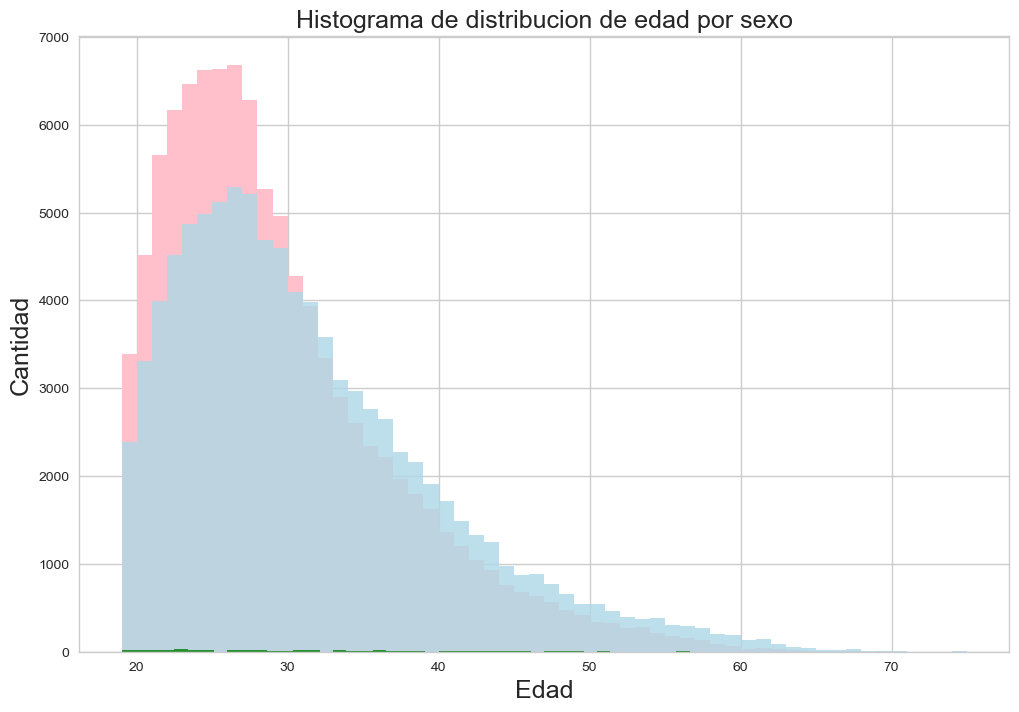

In [132]:
plt.subplots(figsize=(12,8))
graf = postulantes_gef["edad"].plot.hist(bins=56, color='pink', label='Mujeres')
graf = postulantes_gem["edad"].plot.hist(bins=56, color='lightblue', alpha=0.8 , label='Hombres')
graf = postulantes_gend["edad"].plot.hist(bins=56, color='green', alpha=0.8, label='No Declara')
graf.set_title("Histograma de distribucion de edad por sexo", fontsize=18)
graf.set_xlabel("Edad",fontsize=18)
graf.set_ylabel("Cantidad", fontsize=18)
plt.savefig('figure04.png')

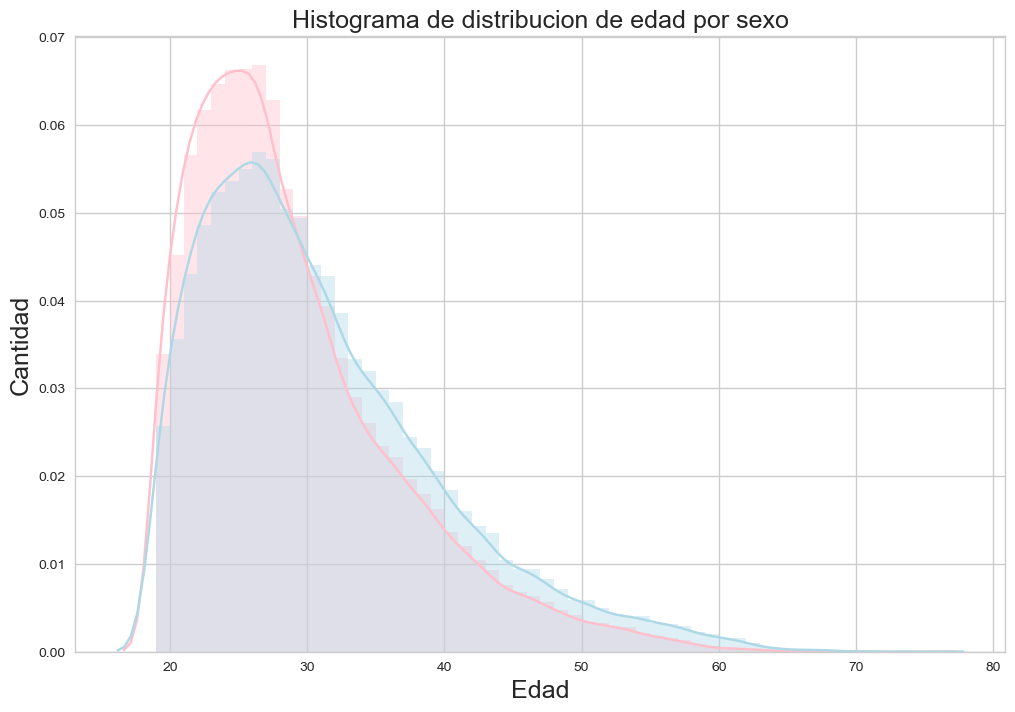

In [133]:
plt.subplots(figsize=(12,8))
graf = sns.distplot(postulantes_gef["edad"], color='pink', label='Mujeres', bins=56)
graf = sns.distplot(postulantes_gem["edad"], color='lightblue', bins=56)
#graf = sns.distplot(postulantes_gend["edad"], color='g', bins=56)
graf.set_title("Histograma de distribucion de edad por sexo", fontsize=18)
graf.set_xlabel("Edad",fontsize=18)
graf.set_ylabel("Cantidad", fontsize=18)
plt.savefig('figure05.png')

# Analisis de distribucion de edades discriminada por sexo

Una vez separada la distribución por sexo de las edades de los postulantes, se pueden observar algunos datos relevantes:

- Son mas las mujeres que los hombres en cuanto a cantidad de postulantes
- Entre 20 y 30 años son mas las mujeres que buscan trabajo (o por lo menos, que se han registrado en la web).
- En el rango que comienza a partir de los 30 años, son mas los hombres postulantes

## -----------------------------------------------------------------------------------
## Analisis Postulaciones por area y estudios
## -----------------------------------------------------------------------------------

In [134]:
avisos = avisos_detalle['idaviso']

In [135]:
area = avisos_detalle['nombre_area']

In [136]:
avisos_area_estudios = pd.DataFrame({'idaviso':avisos, 'area':area })

In [137]:
avisos_area_estudios.area.value_counts()

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Otros                                     153
Marketing                                 153
Administración de Personal                152
Recepcionista                             151
Transporte                        

In [138]:
avisos_area_estudios.head(20)

,area,idaviso
0,Comercial,8725750
1,Salud,17903700
2,Transporte,1000150677
3,Transporte,1000610287
4,Producción,1000872556
5,Ventas,1001135716
6,Ventas,1001326344
7,Ventas,1001455648
8,Comercial,9240880
9,Atención al Cliente,1001202662


In [139]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.9+ MB


In [140]:
postulantes_carrera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188752 entries, 0 to 188751
Data columns (total 3 columns):
idpostulante       188752 non-null object
pondera_carrera    188752 non-null int64
carrera            188752 non-null category
dtypes: category(1), int64(1), object(1)
memory usage: 3.1+ MB


In [141]:
postulaciones_x_carrera = postulaciones.join(postulantes_carrera.set_index('idpostulante'), on='idpostulante', rsuffix='postulac', lsuffix='carrera', how='inner')

In [142]:
postulaciones_x_carrera = postulaciones_x_carrera.drop(['fechapostulacion', 'pondera_carrera'] , axis=1)

In [143]:
postulaciones_x_carrera.head(10)

,idaviso,idpostulante,carrera
0,1112257047,NM5M,Secundario Graduado
1,1111920714,NM5M,Secundario Graduado
2,1112346945,NM5M,Secundario Graduado
3,1112345547,NM5M,Secundario Graduado
4,1112237522,5awk,Universitario Graduado
5,1112277633,5awk,Universitario Graduado
6,1112302347,5awk,Universitario Graduado
7,1112291495,5awk,Universitario Graduado
8,1112304011,5awk,Universitario Graduado
9,1112326289,5awk,Universitario Graduado


In [144]:
avisos_carrera_area = postulaciones_x_carrera.join(avisos_area_estudios.set_index('idaviso'), on='idaviso', rsuffix='area_', lsuffix='carrera', how='inner')

In [145]:
avisos_carrera_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985090 entries, 0 to 3389811
Data columns (total 4 columns):
idaviso         int64
idpostulante    object
carrera         category
area            object
dtypes: category(1), int64(1), object(2)
memory usage: 93.9+ MB


In [146]:
avisos_carrera_area['carrera']=avisos_carrera_area.carrera.astype('object')

In [147]:
avisos_carrera_area

,idaviso,idpostulante,carrera,area
0,1112257047,NM5M,Secundario Graduado,Atención al Cliente
4298,1112257047,1kJqGb,Universitario En Curso,Atención al Cliente
4782,1112257047,eOE9Rr,Universitario Abandonado,Atención al Cliente
5442,1112257047,Zrx8Xz,Terciario/Técnico Graduado,Atención al Cliente
5592,1112257047,ZrKNQY,Universitario Graduado,Atención al Cliente
5677,1112257047,ZrKRZV,Universitario En Curso,Atención al Cliente
6677,1112257047,NEvxD4,Universitario En Curso,Atención al Cliente
9317,1112257047,YkxPNw,Terciario/Técnico Graduado,Atención al Cliente
13414,1112257047,Eb4mY4,Secundario Graduado,Atención al Cliente
14615,1112257047,aLWe1q,Secundario Graduado,Atención al Cliente


## Se grafica la cantidad de postulaciones por nivel de estudios

In [148]:
grafico_barras =pd.DataFrame(avisos_carrera_area['carrera'].value_counts())

In [149]:
grafico_barras.reset_index()

,index,carrera
0,Universitario En Curso,813143
1,Secundario Graduado,758853
2,Universitario Graduado,502349
3,Terciario/Técnico Graduado,213734
4,Universitario Abandonado,162700
5,Terciario/Técnico En Curso,153308
6,Otro Graduado,106986
7,Posgrado Graduado,59524
8,Terciario/Técnico Abandonado,43882
9,Secundario En Curso,38392


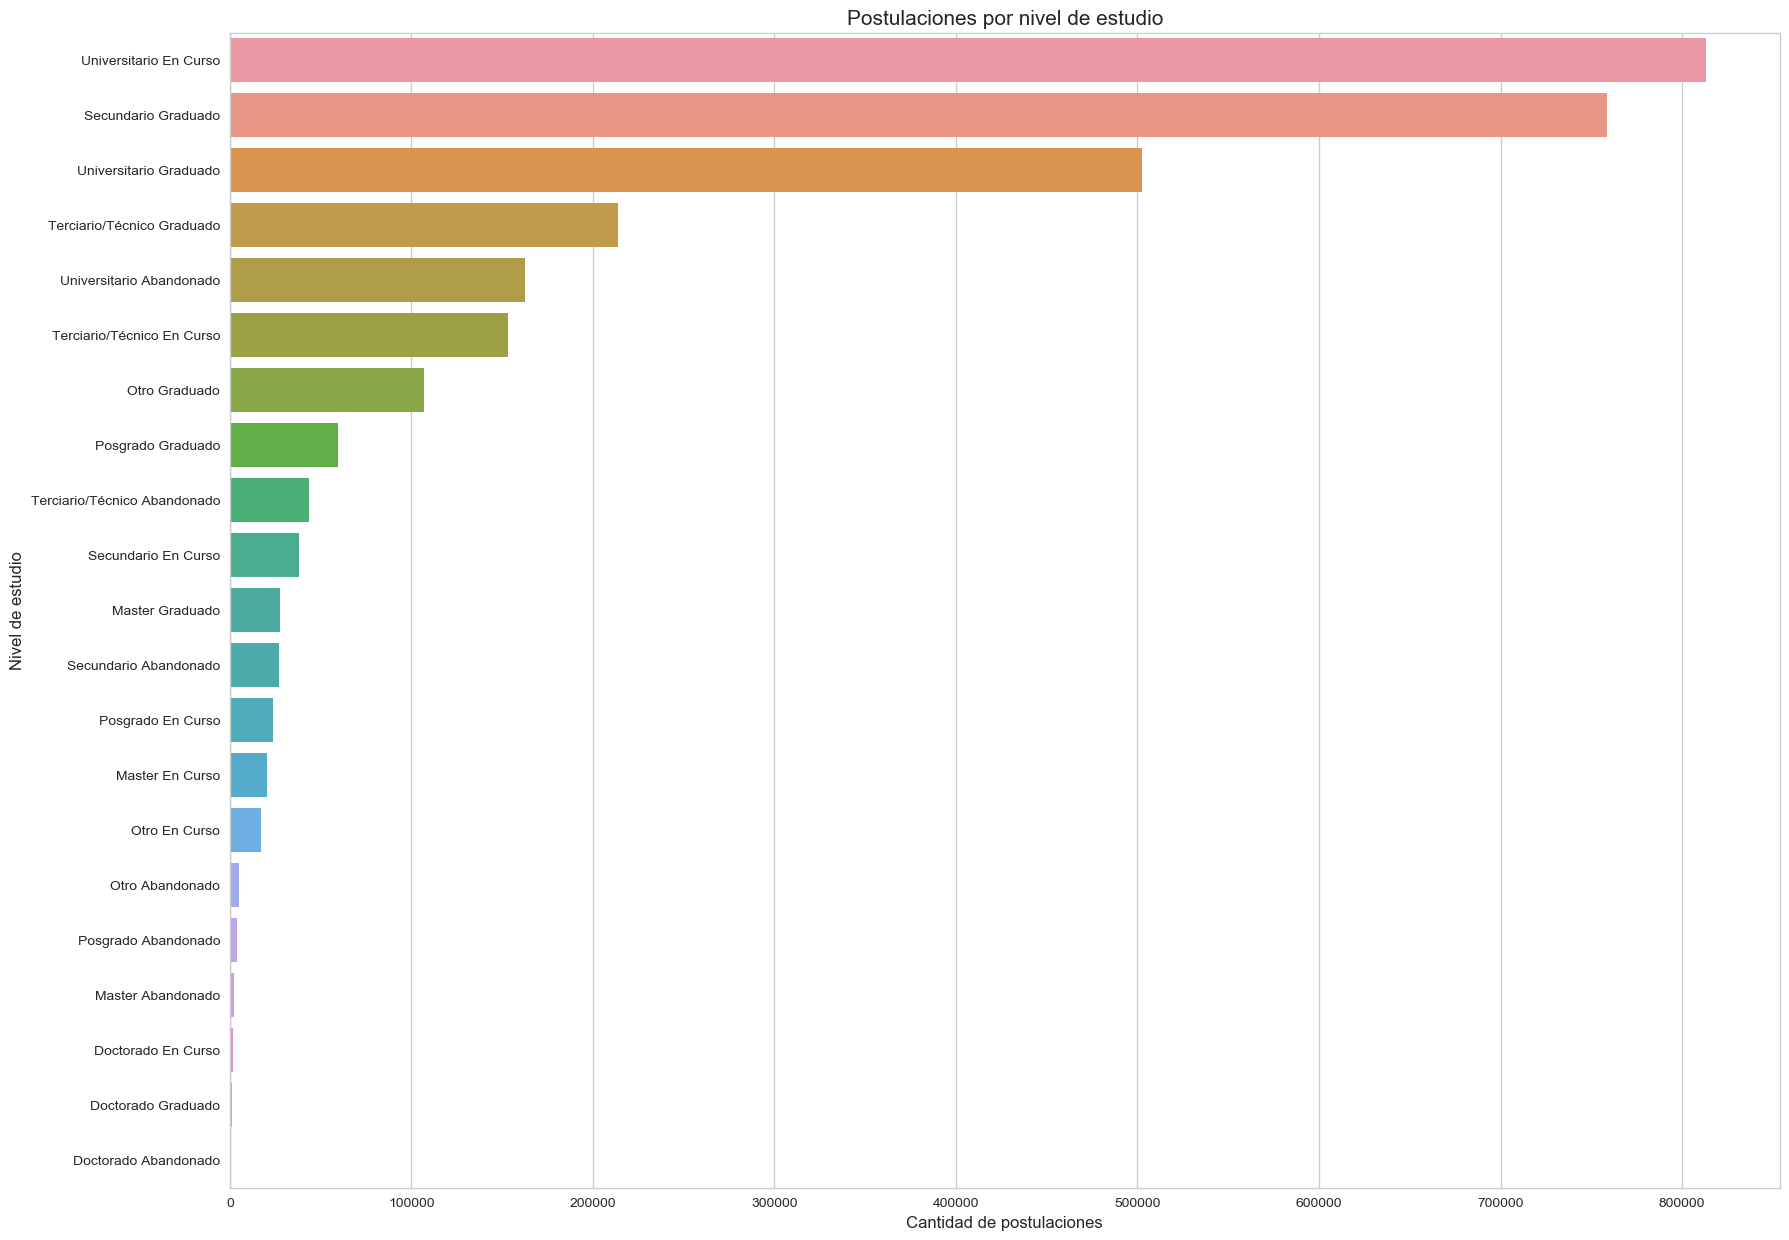

In [150]:
plt.subplots(figsize=(20,15))
g = sns.barplot(x=grafico_barras.carrera, y=grafico_barras.index,)
g.set_title("Postulaciones por nivel de estudio", fontsize=15)
g.set_ylabel("Nivel de estudio", fontsize=12)
g.set_xlabel("Cantidad de postulaciones", fontsize=12)
plt.savefig('figure06.png')

# Observaciones acerca de la distribución de los niveles mas altos de estudio entre los postulantes

- Mas de la mitad de las postulaciones fueron hechas por personas con nivel secundario completo y universitario en curso. Esto tiene coherencia con la distribucion de edades de los postulantes, las cuales estan en el rango de 20-30 años

- Muy bajas las postulaciones de gente con estudios de Master y Doctorado.



## Se Calcula el Heatmap para la combinación de Carreras y Areas

In [151]:
for_heatmap = avisos_carrera_area.pivot_table(index='area', columns='carrera', values='idpostulante', aggfunc='count')

In [152]:
for_heatmap = for_heatmap.fillna(0)

In [153]:
for_heatmap

carrera,Doctorado Abandonado,Doctorado En Curso,Doctorado Graduado,Master Abandonado,Master En Curso,Master Graduado,Otro Abandonado,Otro En Curso,Otro Graduado,Posgrado Abandonado,...,Posgrado Graduado,Secundario Abandonado,Secundario En Curso,Secundario Graduado,Terciario/Técnico Abandonado,Terciario/Técnico En Curso,Terciario/Técnico Graduado,Universitario Abandonado,Universitario En Curso,Universitario Graduado
area,,,,,,,,,,,,,,,,,,,,,
Abastecimiento,1.0,2.0,3.0,14.0,58.0,82.0,24.0,66.0,413.0,9.0,...,156.0,166.0,282.0,4392.0,177.0,506.0,700.0,485.0,2027.0,1099.0
Administracion de Seguros,0.0,2.0,2.0,3.0,37.0,30.0,2.0,17.0,125.0,6.0,...,111.0,8.0,14.0,603.0,83.0,255.0,349.0,299.0,1464.0,990.0
Administración,10.0,194.0,84.0,229.0,1619.0,1931.0,186.0,1243.0,6708.0,450.0,...,4965.0,517.0,909.0,42153.0,4443.0,16030.0,22100.0,19562.0,108209.0,53586.0
Administración de Base de Datos,0.0,1.0,1.0,1.0,10.0,8.0,0.0,0.0,12.0,0.0,...,11.0,0.0,0.0,63.0,6.0,33.0,24.0,20.0,174.0,137.0
Administración de Personal,0.0,12.0,27.0,22.0,236.0,352.0,84.0,151.0,959.0,29.0,...,792.0,402.0,555.0,6389.0,357.0,1632.0,2549.0,1572.0,11490.0,7821.0
Almacén / Depósito / Expedición,1.0,8.0,4.0,19.0,89.0,227.0,161.0,315.0,2710.0,38.0,...,507.0,1306.0,1377.0,24891.0,905.0,2258.0,3394.0,2167.0,7150.0,2757.0
Análisis Funcional,6.0,1.0,6.0,9.0,111.0,110.0,0.0,7.0,71.0,24.0,...,249.0,5.0,17.0,308.0,31.0,293.0,390.0,316.0,1606.0,2004.0
Análisis de Riesgos,0.0,6.0,14.0,10.0,208.0,175.0,0.0,7.0,47.0,22.0,...,242.0,4.0,7.0,250.0,35.0,158.0,180.0,246.0,2344.0,2395.0
Apoderado Aduanal,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,7.0,0.0,...,7.0,0.0,5.0,53.0,2.0,34.0,74.0,19.0,156.0,99.0


In [154]:
for_heatmap = pd.concat([for_heatmap,pd.DataFrame(for_heatmap.sum(axis=1),columns=['total'])],axis=1)

In [155]:
for_heatmap.head(10)

,Doctorado Abandonado,Doctorado En Curso,Doctorado Graduado,Master Abandonado,Master En Curso,Master Graduado,Otro Abandonado,Otro En Curso,Otro Graduado,Posgrado Abandonado,...,Secundario Abandonado,Secundario En Curso,Secundario Graduado,Terciario/Técnico Abandonado,Terciario/Técnico En Curso,Terciario/Técnico Graduado,Universitario Abandonado,Universitario En Curso,Universitario Graduado,total
area,,,,,,,,,,,,,,,,,,,,,
Abastecimiento,1.0,2.0,3.0,14.0,58.0,82.0,24.0,66.0,413.0,9.0,...,166.0,282.0,4392.0,177.0,506.0,700.0,485.0,2027.0,1099.0,10728.0
Administracion de Seguros,0.0,2.0,2.0,3.0,37.0,30.0,2.0,17.0,125.0,6.0,...,8.0,14.0,603.0,83.0,255.0,349.0,299.0,1464.0,990.0,4442.0
Administración,10.0,194.0,84.0,229.0,1619.0,1931.0,186.0,1243.0,6708.0,450.0,...,517.0,909.0,42153.0,4443.0,16030.0,22100.0,19562.0,108209.0,53586.0,287231.0
Administración de Base de Datos,0.0,1.0,1.0,1.0,10.0,8.0,0.0,0.0,12.0,0.0,...,0.0,0.0,63.0,6.0,33.0,24.0,20.0,174.0,137.0,517.0
Administración de Personal,0.0,12.0,27.0,22.0,236.0,352.0,84.0,151.0,959.0,29.0,...,402.0,555.0,6389.0,357.0,1632.0,2549.0,1572.0,11490.0,7821.0,35798.0
Almacén / Depósito / Expedición,1.0,8.0,4.0,19.0,89.0,227.0,161.0,315.0,2710.0,38.0,...,1306.0,1377.0,24891.0,905.0,2258.0,3394.0,2167.0,7150.0,2757.0,50433.0
Análisis Funcional,6.0,1.0,6.0,9.0,111.0,110.0,0.0,7.0,71.0,24.0,...,5.0,17.0,308.0,31.0,293.0,390.0,316.0,1606.0,2004.0,5656.0
Análisis de Riesgos,0.0,6.0,14.0,10.0,208.0,175.0,0.0,7.0,47.0,22.0,...,4.0,7.0,250.0,35.0,158.0,180.0,246.0,2344.0,2395.0,6443.0
Apoderado Aduanal,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,7.0,0.0,...,0.0,5.0,53.0,2.0,34.0,74.0,19.0,156.0,99.0,468.0


In [156]:
for_heatmap01=for_heatmap.sort_values(by='total', ascending=False).head(20)

In [157]:
for_heatmap01=for_heatmap01.drop('total', axis=1)

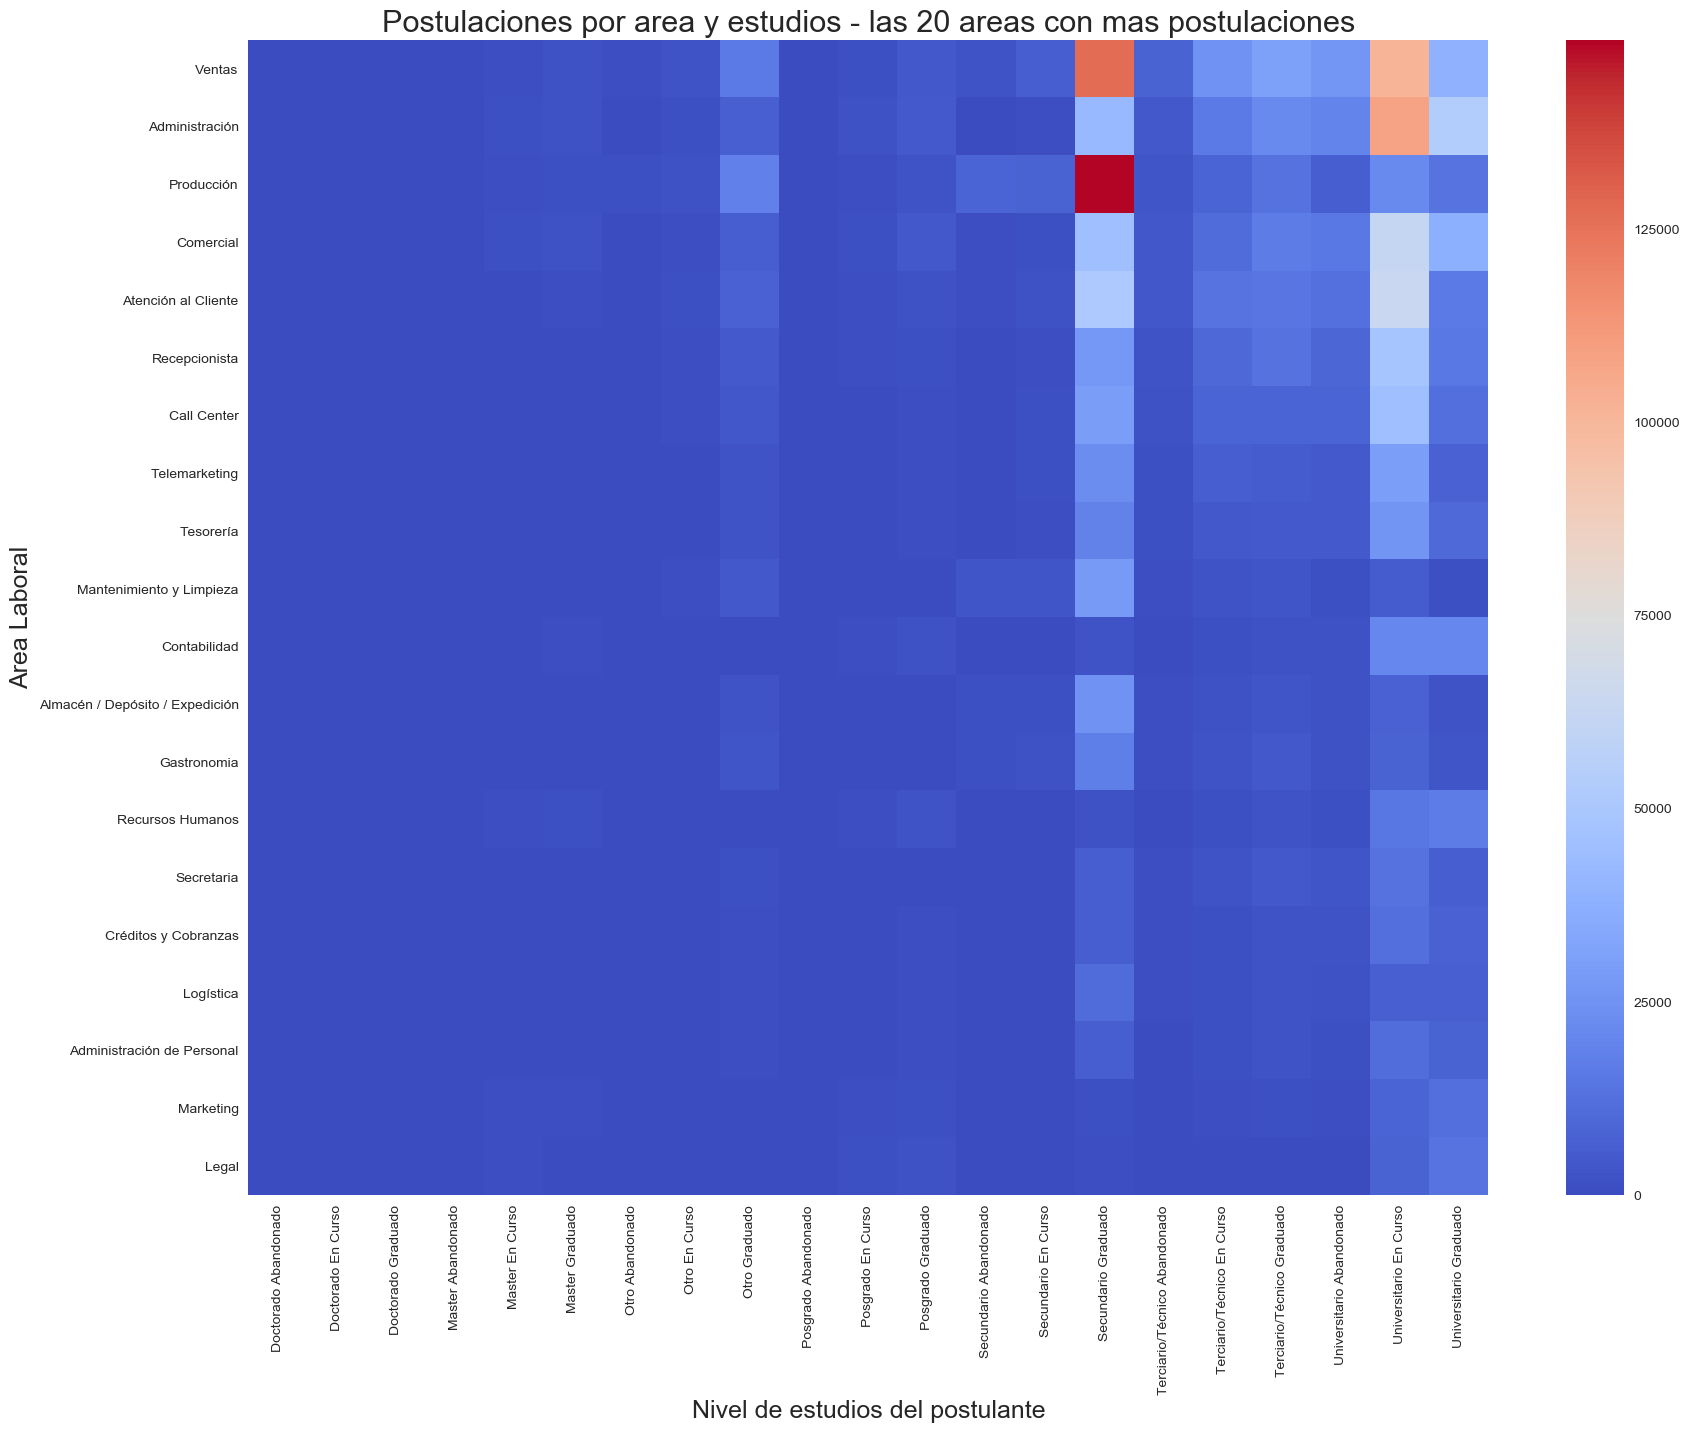

In [186]:
plt.subplots(figsize=(20,15))
g = sns.heatmap(for_heatmap01,  cmap='coolwarm')
g.set_title("Postulaciones por area y estudios - las 20 areas con mas postulaciones", fontsize=22)
g.set_xlabel("Nivel de estudios del postulante",fontsize=18)
g.set_ylabel("Area Laboral", fontsize=18)
plt.savefig('figure07.png')

# Observaciones sobre el grafico de areas con mayor cantidad de Postulaciones

- Las areas con mas avisos y que mas postulaciones reciben son justamente las que menor nivel de estudios requieren, relacionadas con ventas, producción, administración

- En dichas areas, las personas con Universitario en curso y Secundario Graduado, son los que mas se postulan (coincidiendo tambien con la predominancia de los totales en cuanto a niveles de estudio)





## ---------------------------------------------------------------------------------------------------------

## Heatmap por Area laborales con mas y menos indice de postulaciones

## ----------------------------------------------------------------------------------------------------------

In [159]:
for_heatmap.head(10)

,Doctorado Abandonado,Doctorado En Curso,Doctorado Graduado,Master Abandonado,Master En Curso,Master Graduado,Otro Abandonado,Otro En Curso,Otro Graduado,Posgrado Abandonado,...,Secundario Abandonado,Secundario En Curso,Secundario Graduado,Terciario/Técnico Abandonado,Terciario/Técnico En Curso,Terciario/Técnico Graduado,Universitario Abandonado,Universitario En Curso,Universitario Graduado,total
area,,,,,,,,,,,,,,,,,,,,,
Abastecimiento,1.0,2.0,3.0,14.0,58.0,82.0,24.0,66.0,413.0,9.0,...,166.0,282.0,4392.0,177.0,506.0,700.0,485.0,2027.0,1099.0,10728.0
Administracion de Seguros,0.0,2.0,2.0,3.0,37.0,30.0,2.0,17.0,125.0,6.0,...,8.0,14.0,603.0,83.0,255.0,349.0,299.0,1464.0,990.0,4442.0
Administración,10.0,194.0,84.0,229.0,1619.0,1931.0,186.0,1243.0,6708.0,450.0,...,517.0,909.0,42153.0,4443.0,16030.0,22100.0,19562.0,108209.0,53586.0,287231.0
Administración de Base de Datos,0.0,1.0,1.0,1.0,10.0,8.0,0.0,0.0,12.0,0.0,...,0.0,0.0,63.0,6.0,33.0,24.0,20.0,174.0,137.0,517.0
Administración de Personal,0.0,12.0,27.0,22.0,236.0,352.0,84.0,151.0,959.0,29.0,...,402.0,555.0,6389.0,357.0,1632.0,2549.0,1572.0,11490.0,7821.0,35798.0
Almacén / Depósito / Expedición,1.0,8.0,4.0,19.0,89.0,227.0,161.0,315.0,2710.0,38.0,...,1306.0,1377.0,24891.0,905.0,2258.0,3394.0,2167.0,7150.0,2757.0,50433.0
Análisis Funcional,6.0,1.0,6.0,9.0,111.0,110.0,0.0,7.0,71.0,24.0,...,5.0,17.0,308.0,31.0,293.0,390.0,316.0,1606.0,2004.0,5656.0
Análisis de Riesgos,0.0,6.0,14.0,10.0,208.0,175.0,0.0,7.0,47.0,22.0,...,4.0,7.0,250.0,35.0,158.0,180.0,246.0,2344.0,2395.0,6443.0
Apoderado Aduanal,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,7.0,0.0,...,0.0,5.0,53.0,2.0,34.0,74.0,19.0,156.0,99.0,468.0


In [160]:
avisos_x_area = pd.DataFrame(avisos_area_estudios.area.value_counts())

In [161]:
avisos_x_area = avisos_x_area.reset_index()

In [162]:
col_rename={'area':'total_avisos', 'index':'area'}
avisos_x_area=avisos_x_area.rename(columns=col_rename)

In [163]:
avisos_x_area.head(10)

,area,total_avisos
0,Ventas,1659
1,Comercial,983
2,Administración,901
3,Producción,821
4,Programación,576
5,Contabilidad,416
6,Tecnologia / Sistemas,388
7,Atención al Cliente,347
8,Mantenimiento,324
9,Recursos Humanos,235


In [164]:
avisos_x_area = avisos_x_area.sort_values(by='area', ascending=True)

In [165]:
avisos_x_area = avisos_x_area.set_index('area')

In [166]:
#rename(index={1: 'a'})

In [167]:
for_heatmap02 = for_heatmap.rename(index={1: 'area'})

In [168]:
for_heatmap02 = for_heatmap02.join(avisos_x_area, how='inner')

In [169]:
for_heatmap02['indice_postul'] =  for_heatmap02['total']/for_heatmap02['total_avisos']

In [170]:
for_heatmap_mas_avisos = for_heatmap02.drop(for_heatmap02[for_heatmap02.total_avisos < 100].index)

In [171]:
for_heatmap_mas_avisos.head(5)

,Doctorado Abandonado,Doctorado En Curso,Doctorado Graduado,Master Abandonado,Master En Curso,Master Graduado,Otro Abandonado,Otro En Curso,Otro Graduado,Posgrado Abandonado,...,Secundario Graduado,Terciario/Técnico Abandonado,Terciario/Técnico En Curso,Terciario/Técnico Graduado,Universitario Abandonado,Universitario En Curso,Universitario Graduado,total,total_avisos,indice_postul
area,,,,,,,,,,,,,,,,,,,,,
Administración,10.0,194.0,84.0,229.0,1619.0,1931.0,186.0,1243.0,6708.0,450.0,...,42153.0,4443.0,16030.0,22100.0,19562.0,108209.0,53586.0,287231.0,901,318.791343
Administración de Personal,0.0,12.0,27.0,22.0,236.0,352.0,84.0,151.0,959.0,29.0,...,6389.0,357.0,1632.0,2549.0,1572.0,11490.0,7821.0,35798.0,152,235.513158
Almacén / Depósito / Expedición,1.0,8.0,4.0,19.0,89.0,227.0,161.0,315.0,2710.0,38.0,...,24891.0,905.0,2258.0,3394.0,2167.0,7150.0,2757.0,50433.0,184,274.092391
Análisis Funcional,6.0,1.0,6.0,9.0,111.0,110.0,0.0,7.0,71.0,24.0,...,308.0,31.0,293.0,390.0,316.0,1606.0,2004.0,5656.0,100,56.560000
Atención al Cliente,11.0,111.0,65.0,49.0,505.0,695.0,248.0,1432.0,7044.0,137.0,...,51079.0,3512.0,13724.0,14537.0,12575.0,64030.0,16333.0,191347.0,347,551.432277


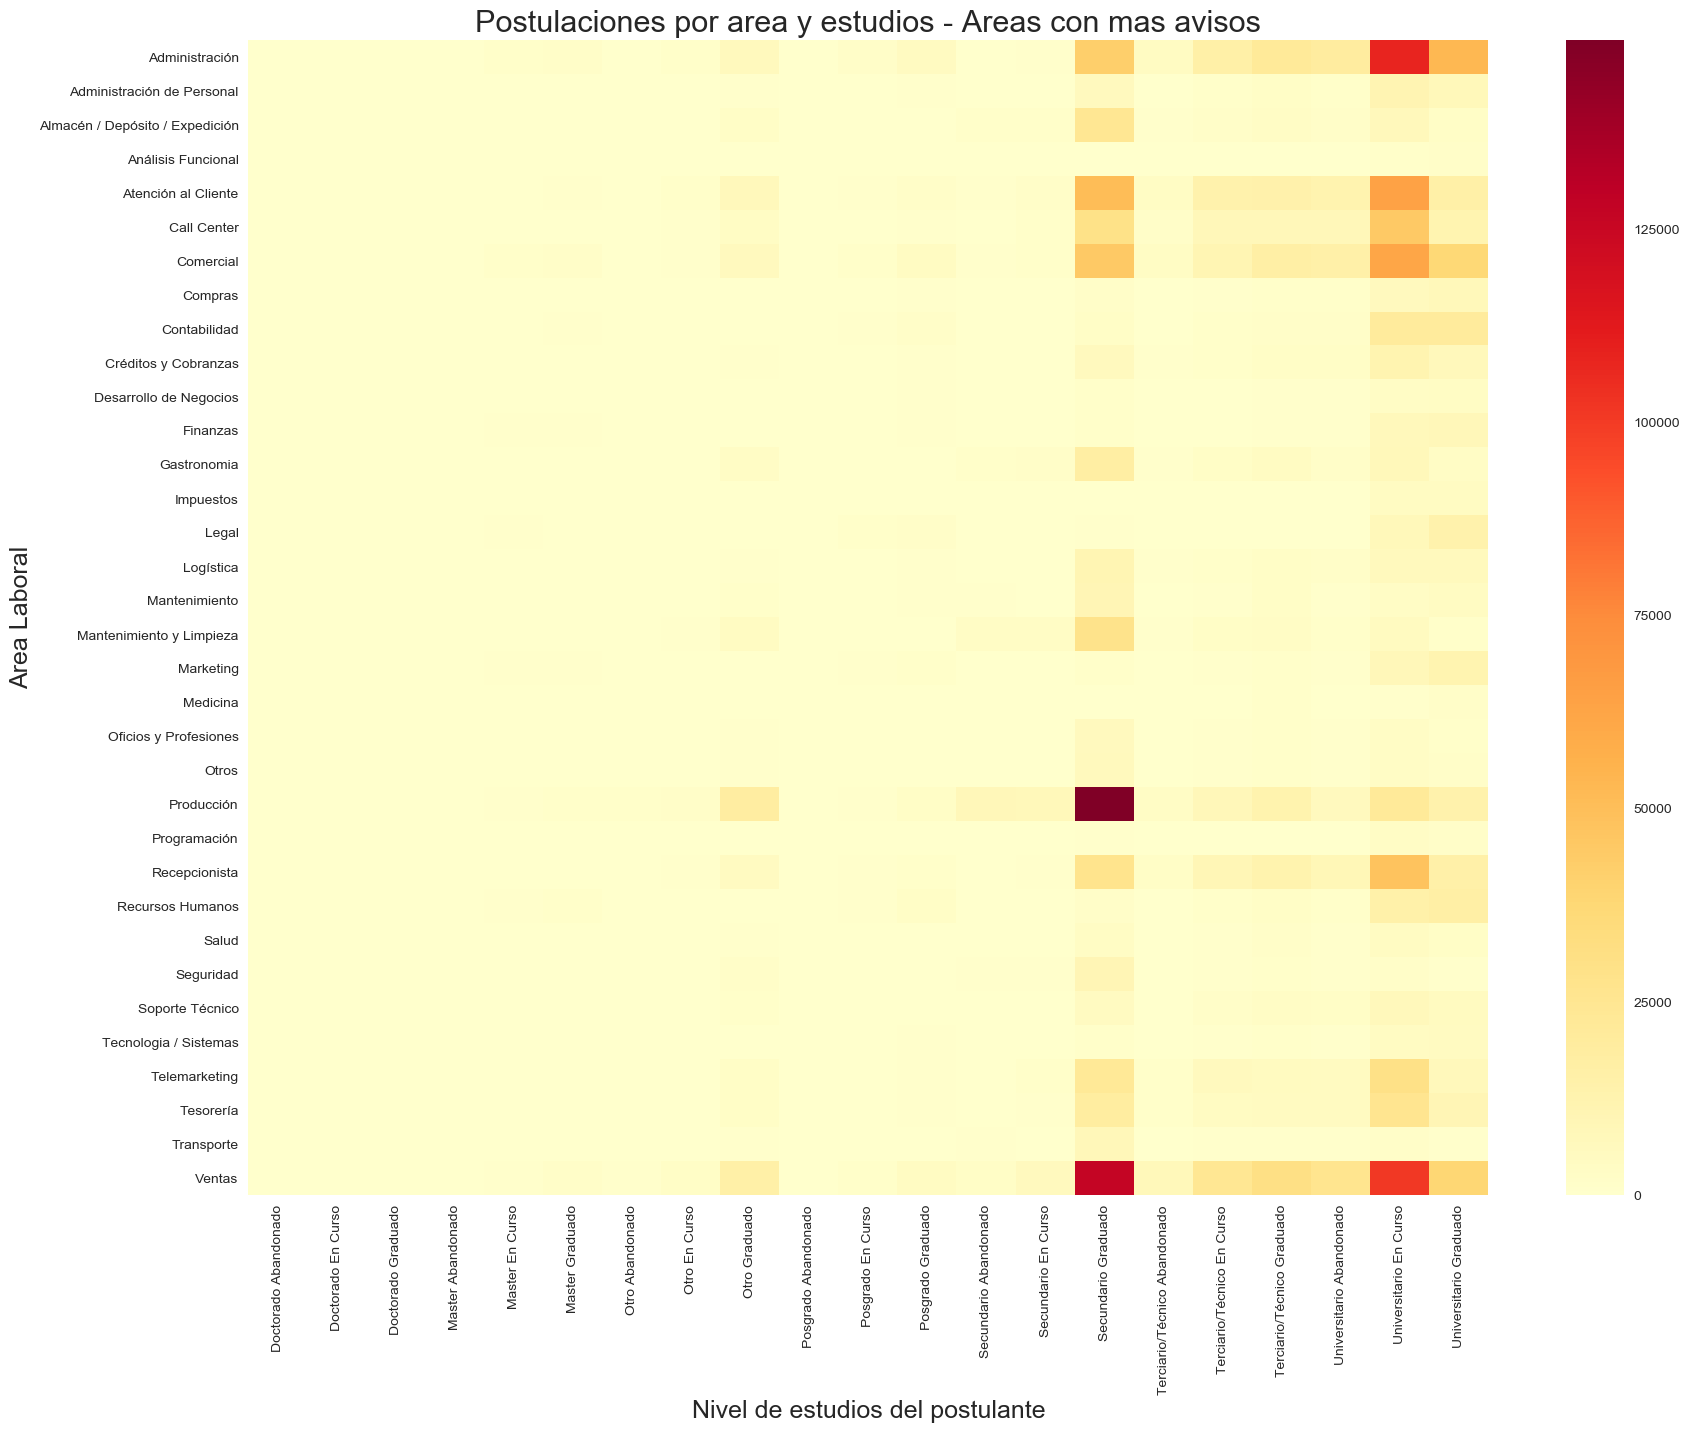

In [172]:
plt.subplots(figsize=(20,15))
g = sns.heatmap(for_heatmap_mas_avisos.drop({'total','total_avisos','indice_postul'}, axis=1),  cmap='YlOrRd')
g.set_title("Postulaciones por area y estudios - Areas con mas avisos", fontsize=22)
g.set_xlabel("Nivel de estudios del postulante",fontsize=18)
g.set_ylabel("Area Laboral", fontsize=18)
plt.savefig('figure08.png')

# Observaciones sobre el grafico de areas con mayor cantidad de avisos

- Los postulantes con nivel de Secundario Graduado se inclinan mas por Comercial, Atencion al Cliente, Administracion, Ventas y Producción.
- Los Universitarios en Curso, por Administracion y Ventas


## ------------------------------------------------------------------------------------------------------

## Heatmap de postulaciones de las areas con mayor indice Postulaciones/avisos

## --------------------------------------------------------------------------------------------------------

In [173]:
## for_heatmap_best_index = for_heatmap02.drop(for_heatmap02[for_heatmap02.indice_postul < 250].index)

In [174]:
for_heatmap_best_index = for_heatmap02[for_heatmap02['indice_postul'] > 200 ]
for_heatmap_best_index = for_heatmap_best_index[for_heatmap_best_index['total_avisos'] > 50 ]

In [188]:
for_heatmap_best_index.head(10)

,Doctorado Abandonado,Doctorado En Curso,Doctorado Graduado,Master Abandonado,Master En Curso,Master Graduado,Otro Abandonado,Otro En Curso,Otro Graduado,Posgrado Abandonado,...,Secundario Graduado,Terciario/Técnico Abandonado,Terciario/Técnico En Curso,Terciario/Técnico Graduado,Universitario Abandonado,Universitario En Curso,Universitario Graduado,total,total_avisos,indice_postul
area,,,,,,,,,,,,,,,,,,,,,
Administración,10.0,194.0,84.0,229.0,1619.0,1931.0,186.0,1243.0,6708.0,450.0,...,42153.0,4443.0,16030.0,22100.0,19562.0,108209.0,53586.0,287231.0,901,318.791343
Administración de Personal,0.0,12.0,27.0,22.0,236.0,352.0,84.0,151.0,959.0,29.0,...,6389.0,357.0,1632.0,2549.0,1572.0,11490.0,7821.0,35798.0,152,235.513158
Almacén / Depósito / Expedición,1.0,8.0,4.0,19.0,89.0,227.0,161.0,315.0,2710.0,38.0,...,24891.0,905.0,2258.0,3394.0,2167.0,7150.0,2757.0,50433.0,184,274.092391
Atención al Cliente,11.0,111.0,65.0,49.0,505.0,695.0,248.0,1432.0,7044.0,137.0,...,51079.0,3512.0,13724.0,14537.0,12575.0,64030.0,16333.0,191347.0,347,551.432277
Call Center,2.0,83.0,24.0,31.0,262.0,404.0,134.0,846.0,4072.0,115.0,...,29634.0,1911.0,8708.0,8739.0,8416.0,45220.0,11693.0,123546.0,191,646.837696
Comercial,15.0,97.0,109.0,193.0,1602.0,2042.0,217.0,1085.0,6001.0,346.0,...,45108.0,3697.0,11057.0,16479.0,15646.0,62383.0,37460.0,211934.0,983,215.599186
Créditos y Cobranzas,0.0,13.0,37.0,19.0,334.0,285.0,35.0,151.0,886.0,79.0,...,6136.0,600.0,1702.0,2408.0,2748.0,11861.0,7534.0,36115.0,132,273.598485
Farmacéutica,0.0,12.0,30.0,18.0,74.0,158.0,48.0,371.0,1865.0,34.0,...,8354.0,414.0,1877.0,2572.0,1404.0,6465.0,3235.0,28094.0,75,374.586667
Gastronomia,0.0,10.0,13.0,10.0,149.0,296.0,268.0,492.0,3242.0,20.0,...,18019.0,829.0,2702.0,4409.0,2242.0,7934.0,3430.0,48035.0,234,205.277778


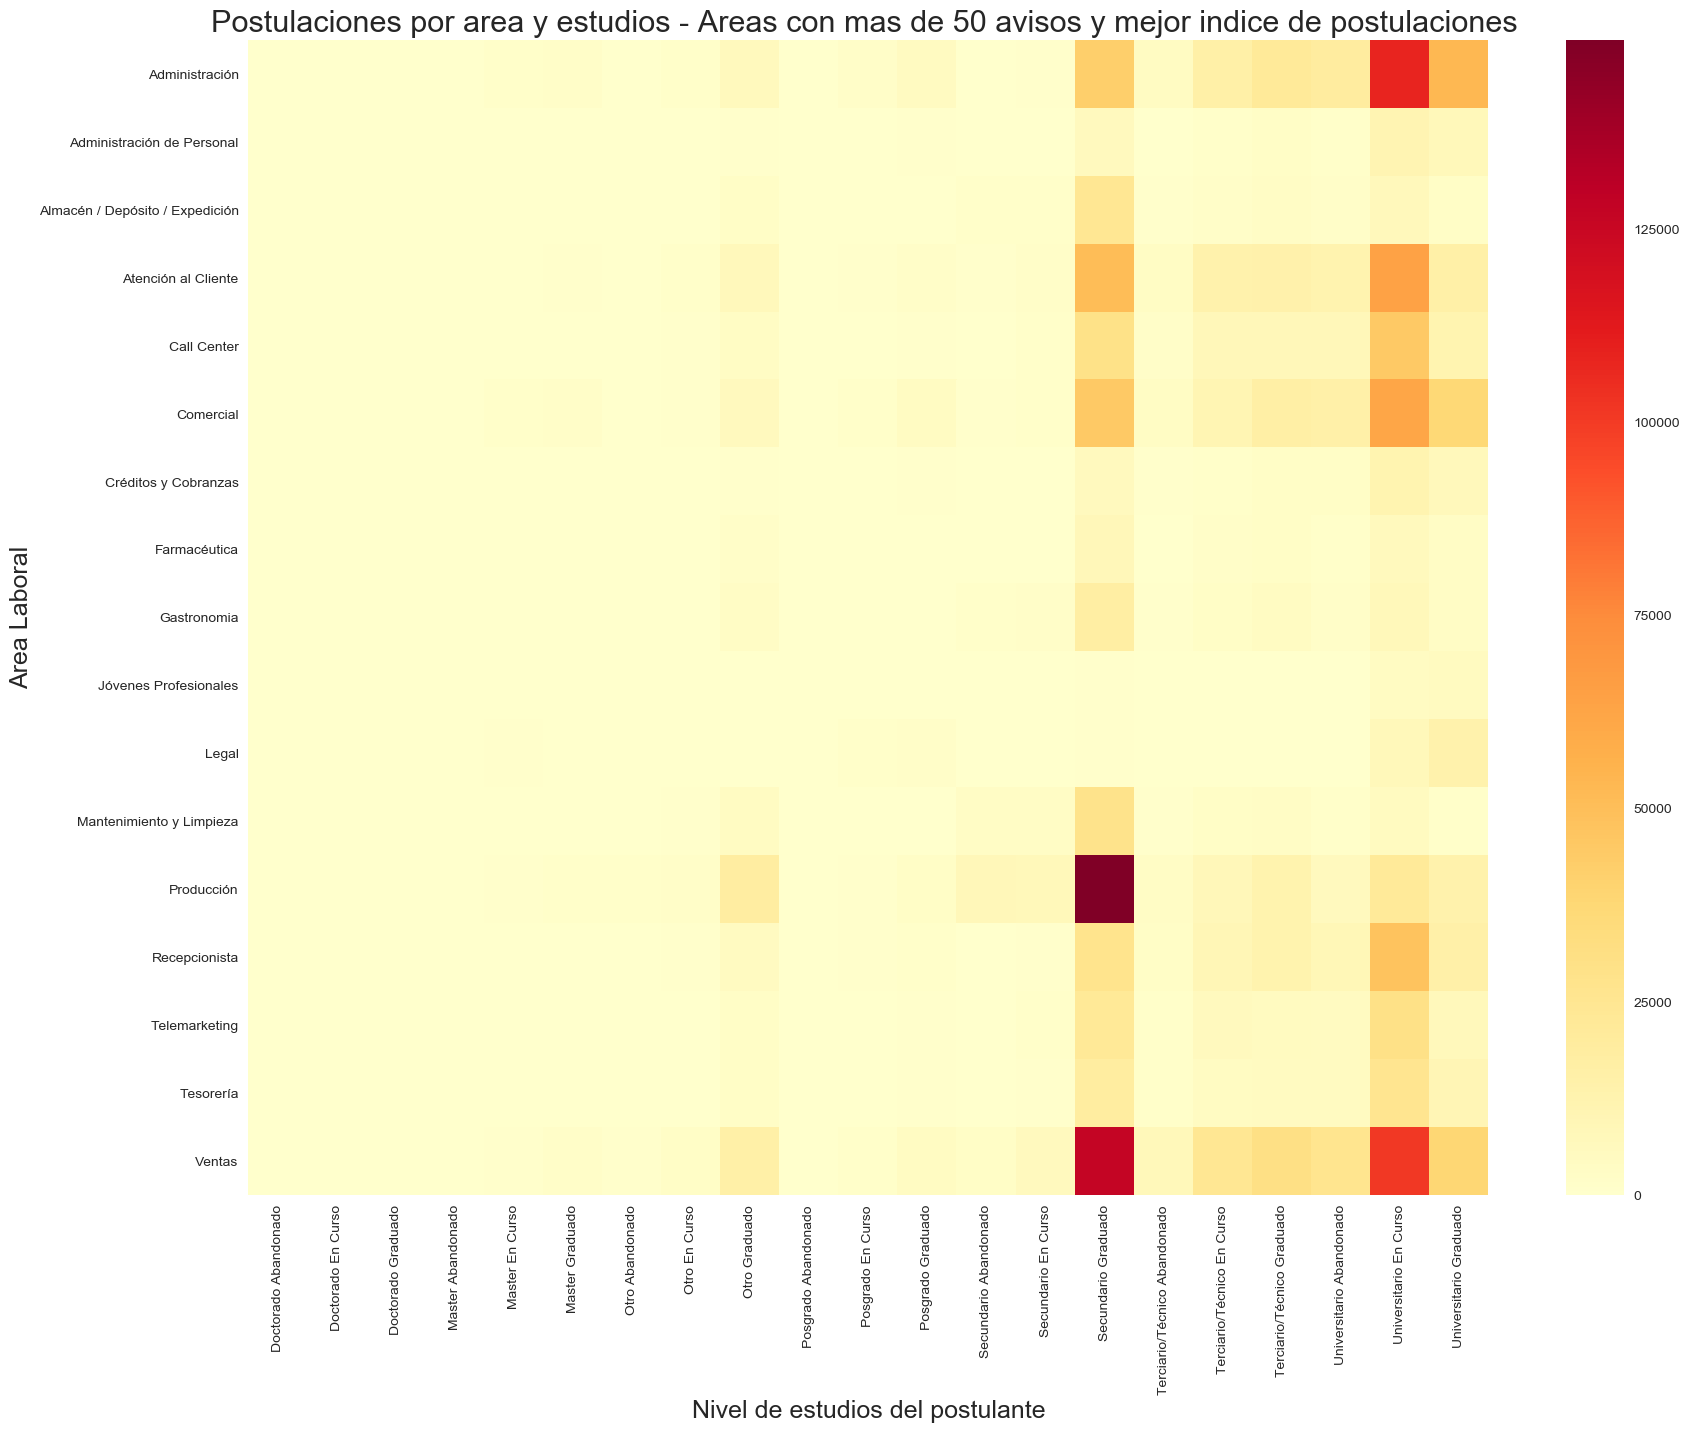

In [182]:
plt.subplots(figsize=(20,15))
g = sns.heatmap(for_heatmap_best_index.drop({'total','total_avisos','indice_postul'}, axis=1),  cmap='YlOrRd')
g.set_title("Postulaciones por area y estudios - Areas con mas de 50 avisos y mejor indice de postulaciones ", fontsize=22)
g.set_xlabel("Nivel de estudios del postulante",fontsize=18)
g.set_ylabel("Area Laboral", fontsize=18)
plt.savefig('figure09.png')

# Observaciones sobre el grafico de areas con mejor indice de Postulaciones/Avisos

Las areas aqui mostradas, son las que por cada aviso publicado, generan mas postulaciones.

El nivel de estudios mayoritario y las edades de los postulantes, hacen a estas areas atractivas para la busqueda de empleos.

El universo de postulantes, se inclina por estos tipos de trabajo, por lo que seria una buena medida aumentar la cantidad de avisos relacionados a estas areas, para poder satisfacer esta demanda y lograr mas empleos concretados.

### -x-x-x-x-x-x-x-x-x-x-x-x-x--x-x-x-x-x-x-x-x--x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

## Heatmap de postulaciones de las areas con menor indice Postulaciones/avisos (mas de 50 avisos)

In [177]:
for_heatmap_worst_index = for_heatmap02[for_heatmap02['indice_postul'] < 200 ]
for_heatmap_worst_index = for_heatmap_worst_index[for_heatmap_worst_index['total_avisos'] > 50 ]

In [178]:
#for_heatmap_worst_index = for_heatmap_worst_index.drop(for_heatmap02[(for_heatmap02.total_avisos < 100)].index)

In [187]:
for_heatmap_worst_index.head(10)

,Doctorado Abandonado,Doctorado En Curso,Doctorado Graduado,Master Abandonado,Master En Curso,Master Graduado,Otro Abandonado,Otro En Curso,Otro Graduado,Posgrado Abandonado,...,Secundario Graduado,Terciario/Técnico Abandonado,Terciario/Técnico En Curso,Terciario/Técnico Graduado,Universitario Abandonado,Universitario En Curso,Universitario Graduado,total,total_avisos,indice_postul
area,,,,,,,,,,,,,,,,,,,,,
Abastecimiento,1.0,2.0,3.0,14.0,58.0,82.0,24.0,66.0,413.0,9.0,...,4392.0,177.0,506.0,700.0,485.0,2027.0,1099.0,10728.0,56,191.571429
Análisis Funcional,6.0,1.0,6.0,9.0,111.0,110.0,0.0,7.0,71.0,24.0,...,308.0,31.0,293.0,390.0,316.0,1606.0,2004.0,5656.0,100,56.560000
Arquitectura,0.0,16.0,4.0,24.0,147.0,139.0,0.0,12.0,46.0,20.0,...,310.0,48.0,89.0,184.0,135.0,1621.0,3649.0,7012.0,69,101.623188
Auditoría,3.0,1.0,5.0,10.0,103.0,136.0,0.0,6.0,61.0,22.0,...,400.0,45.0,163.0,271.0,222.0,2513.0,2598.0,7086.0,68,104.205882
Business Intelligence,3.0,7.0,8.0,11.0,233.0,260.0,0.0,5.0,34.0,11.0,...,128.0,22.0,136.0,309.0,194.0,1604.0,2447.0,5878.0,51,115.254902
Calidad,2.0,21.0,21.0,33.0,256.0,236.0,2.0,27.0,196.0,39.0,...,1933.0,69.0,331.0,866.0,377.0,2691.0,4325.0,12280.0,94,130.638298
Compras,35.0,13.0,3.0,54.0,362.0,578.0,16.0,57.0,343.0,52.0,...,2267.0,220.0,737.0,1406.0,1431.0,6319.0,7956.0,23554.0,170,138.552941
Compras Internacionales/Importación,6.0,2.0,0.0,3.0,154.0,151.0,5.0,23.0,76.0,9.0,...,574.0,27.0,462.0,877.0,367.0,2691.0,3182.0,9177.0,53,173.150943
Construcción,0.0,26.0,7.0,27.0,173.0,163.0,1.0,31.0,134.0,38.0,...,843.0,86.0,176.0,446.0,300.0,1496.0,4336.0,8995.0,97,92.731959


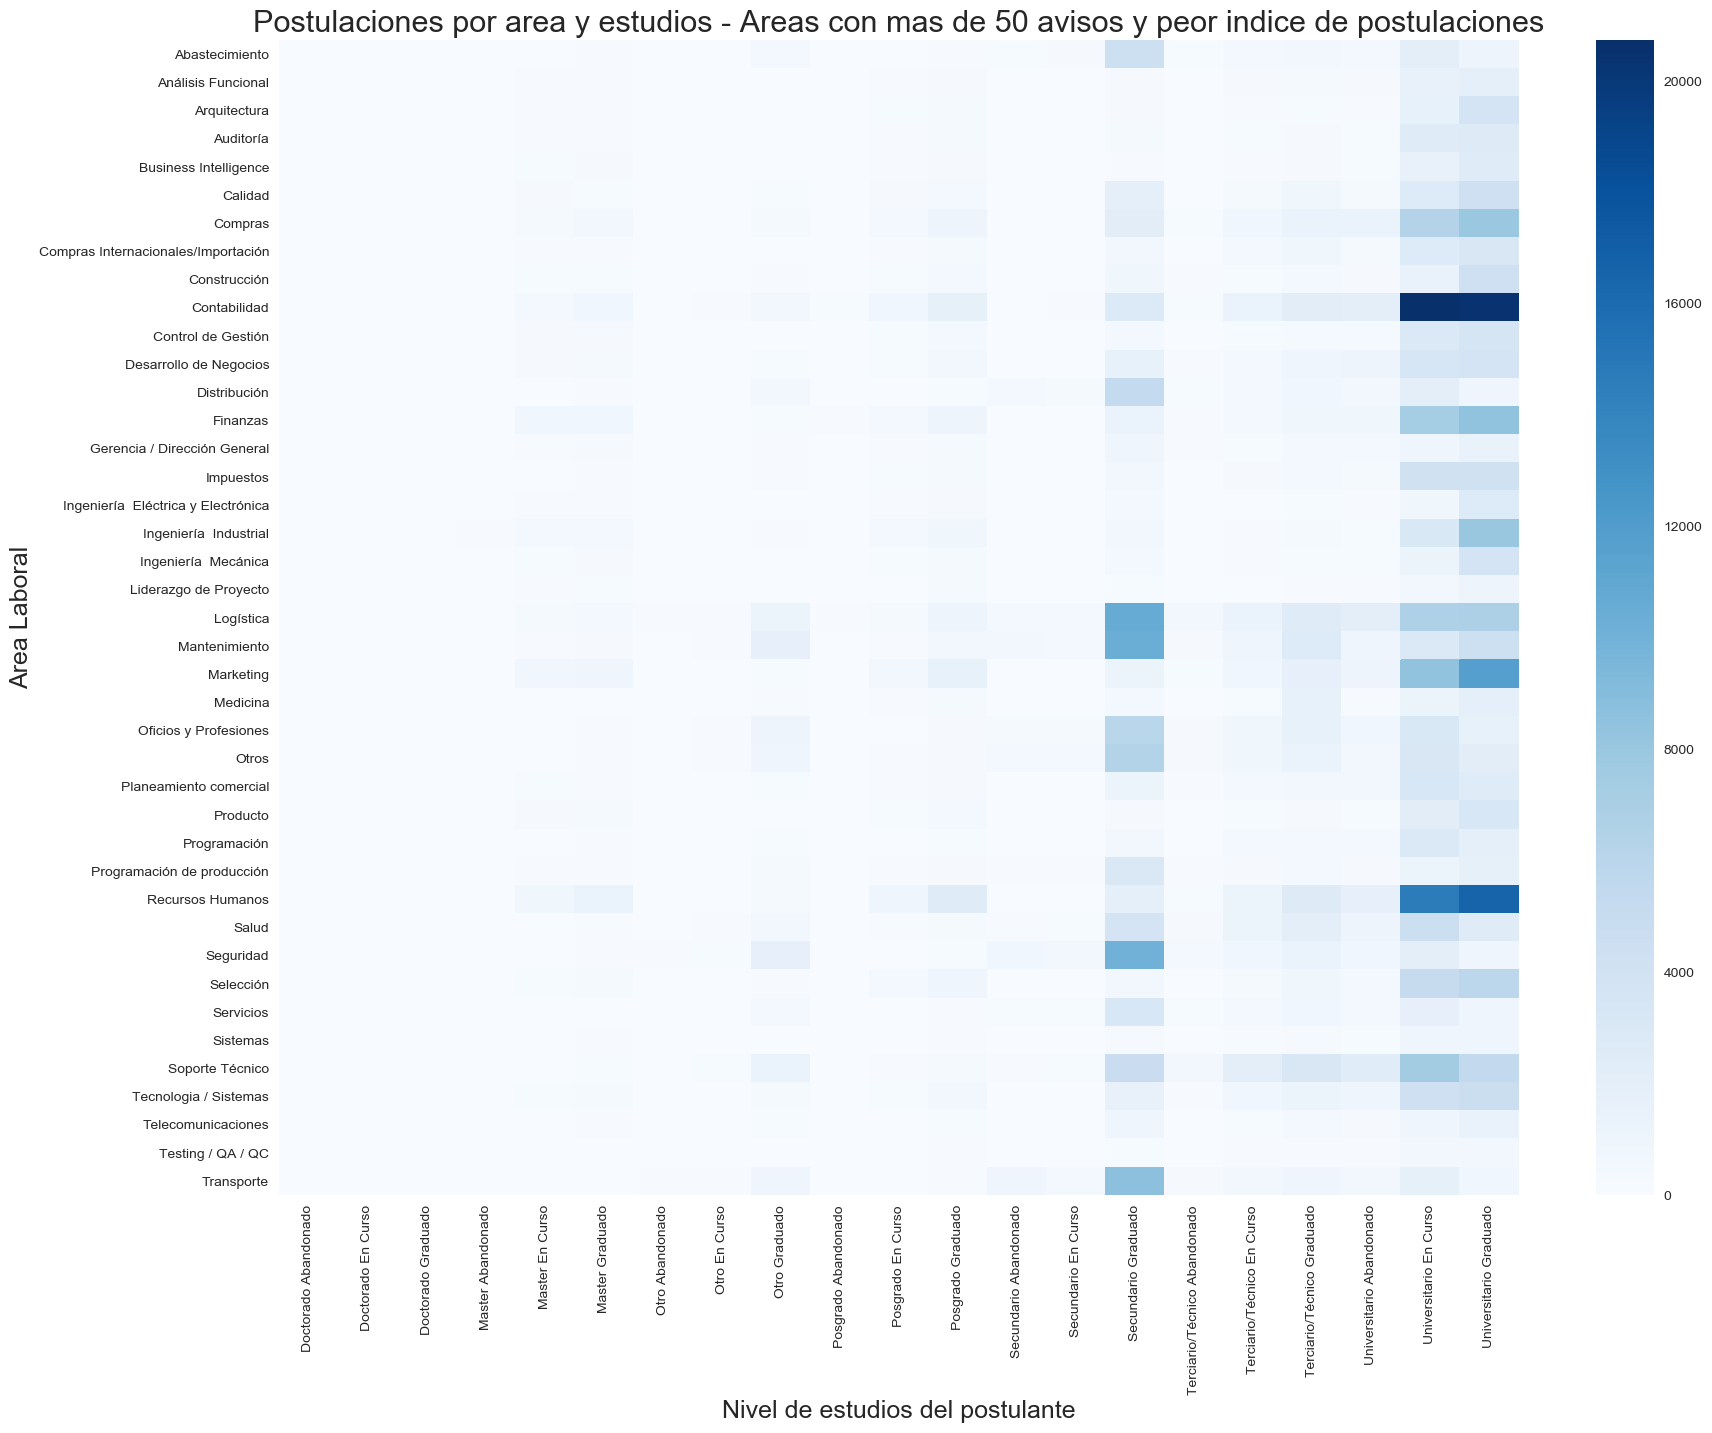

In [180]:
plt.subplots(figsize=(20,15))
g = sns.heatmap(for_heatmap_worst_index.drop({'total','total_avisos','indice_postul'}, axis=1),  cmap='Blues')
g.set_title("Postulaciones por area y estudios - Areas con mas de 50 avisos y peor indice de postulaciones", fontsize=22)
g.set_xlabel("Nivel de estudios del postulante",fontsize=18)
g.set_ylabel("Area Laboral", fontsize=18)
plt.savefig('figure10.png')

# Observaciones sobre el grafico de areas con mayor cantidad de Postulaciones

En este Heatmap se pueden ver las areas en las cuales hay mas avidez de puestos laborales. 
Se seleccionan las areas con mas de 50 avisos, y entre ellas, las que menor indice de Avisos/Postulaciones tienen. Esto marca que es poca la cantidad de postulaciones por aviso, por lo que se puede tener una idea de cuales son las que necesitan trabajo para aumentar las postulaciones.

Campañas para sumar mas postulantes potencialmente interesados en esas areas, mostrar en portada mas avisos de esas areas, puede ayudar a subir esta relacion de postulaciones.



# =======================================================================================================

# Conclusiones Finales sobre los analisis

# =======================================================================================================

- Las areas mas destacadas en cuanto a indice de postulaciones y cantidad de avisos son las de Ventas, Administracion, Produccion

- Las areas con menor relacion Avisos/Postulaciones, son las que se deben trabajar para lograr mas postulaciones, incrementando la difusion y tratando de aumentar la cantidad de potenciales interesados en esas areas

- Las areas con mayor relacoin Avisos/Postulaciones, son las que se deben trabajar en sumar mas avisos para satisfacer la demanda de empleo en las mismas

- Las niveles de estudio mas altos (Posgrados, Masters y Doctorado) tienen muy baja participacion de postulaciones. Eso quizas sea a la cantidad de ofertas laborales que buscan esos perfiles. Una buena opcion seria intentar aumentar la oferta de dichos avisos para gente mas capacitada.

- Hay muchas compañias de busqueda de personal y recursos humanos que publican avisos (y que concentran la mayor cantidad de los mismos). 

- OTRAS CONCLUSIONES (AGREGAR)